In [242]:
%load_ext watermark
%watermark -a "Romell D.Z." -u -d -p numpy,pandas,matplotlib,seaborn,statsmodels

Romell D.Z. 
last updated: 2018-11-24 

numpy 1.15.4
pandas 0.23.4
matplotlib 2.2.2
seaborn 0.9.0
statsmodels 0.10.0.dev0+3261eea


In [7]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns
sns.set('notebook')
from __future__ import division
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (18,8)
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
%config InlineBackend.figure_format = 'retina'

In [220]:
list_df = []
dic = dict(Enero=1,Febrero=2,Marzo=3,Abril=4,Mayo=5,Junio=6,Julio=7,
           Agosto=8,Septiembre=9,Octubre=10,Noviembre=11,Diciembre=12)
dic_inv= {v: k for k, v in dic.items()}

In [69]:
def clean_excel_to_dataframe(nameExcel,nameSheet,ski, year = 2004):
    df = iqutos_FAP = pd.read_excel(nameExcel,sheet_name=nameSheet,nrows=12,
                           skiprows=ski,index_col=0,)
    df.dropna(axis=1,inplace=True)
    drop = df.columns.str.contains('Total')
    if drop != []:
        df = df.drop(df.columns[drop],axis=1)
    list_df = []
    for enum,col in enumerate(np.arange(0,df.columns.size,2)):
        airport = df.iloc[:,[col,col+1]].copy()
        airport['Date'] = airport.index.map(dic)
        airport.Date = airport.apply(lambda row: pd.datetime(year+enum, row['Date'],1), axis=1)
        airport = airport.set_index('Date')
        airport.append(airport)
        list_df.append(airport)

    df_clean = pd.concat(list_df)
    df_clean = df_clean.sum(1)
    return df_clean

In [223]:
def bar_plot(df):
    df = df.groupby( df.index.month).median()
    df.sort_values(ascending=False,inplace=True)
    ax=df.plot(kind='bar')
    for i, v in enumerate(df.values):
        ax.text(i-.2 , v , str(v), color='black', fontweight='bold')
    plt.yscale('log')
    plt.title('Group by month Perú')
    plt.ylabel('Count of Passenger')
    plt.xticks(range(12),[dic_inv[m] 
                          for m in df.index],rotation=0);

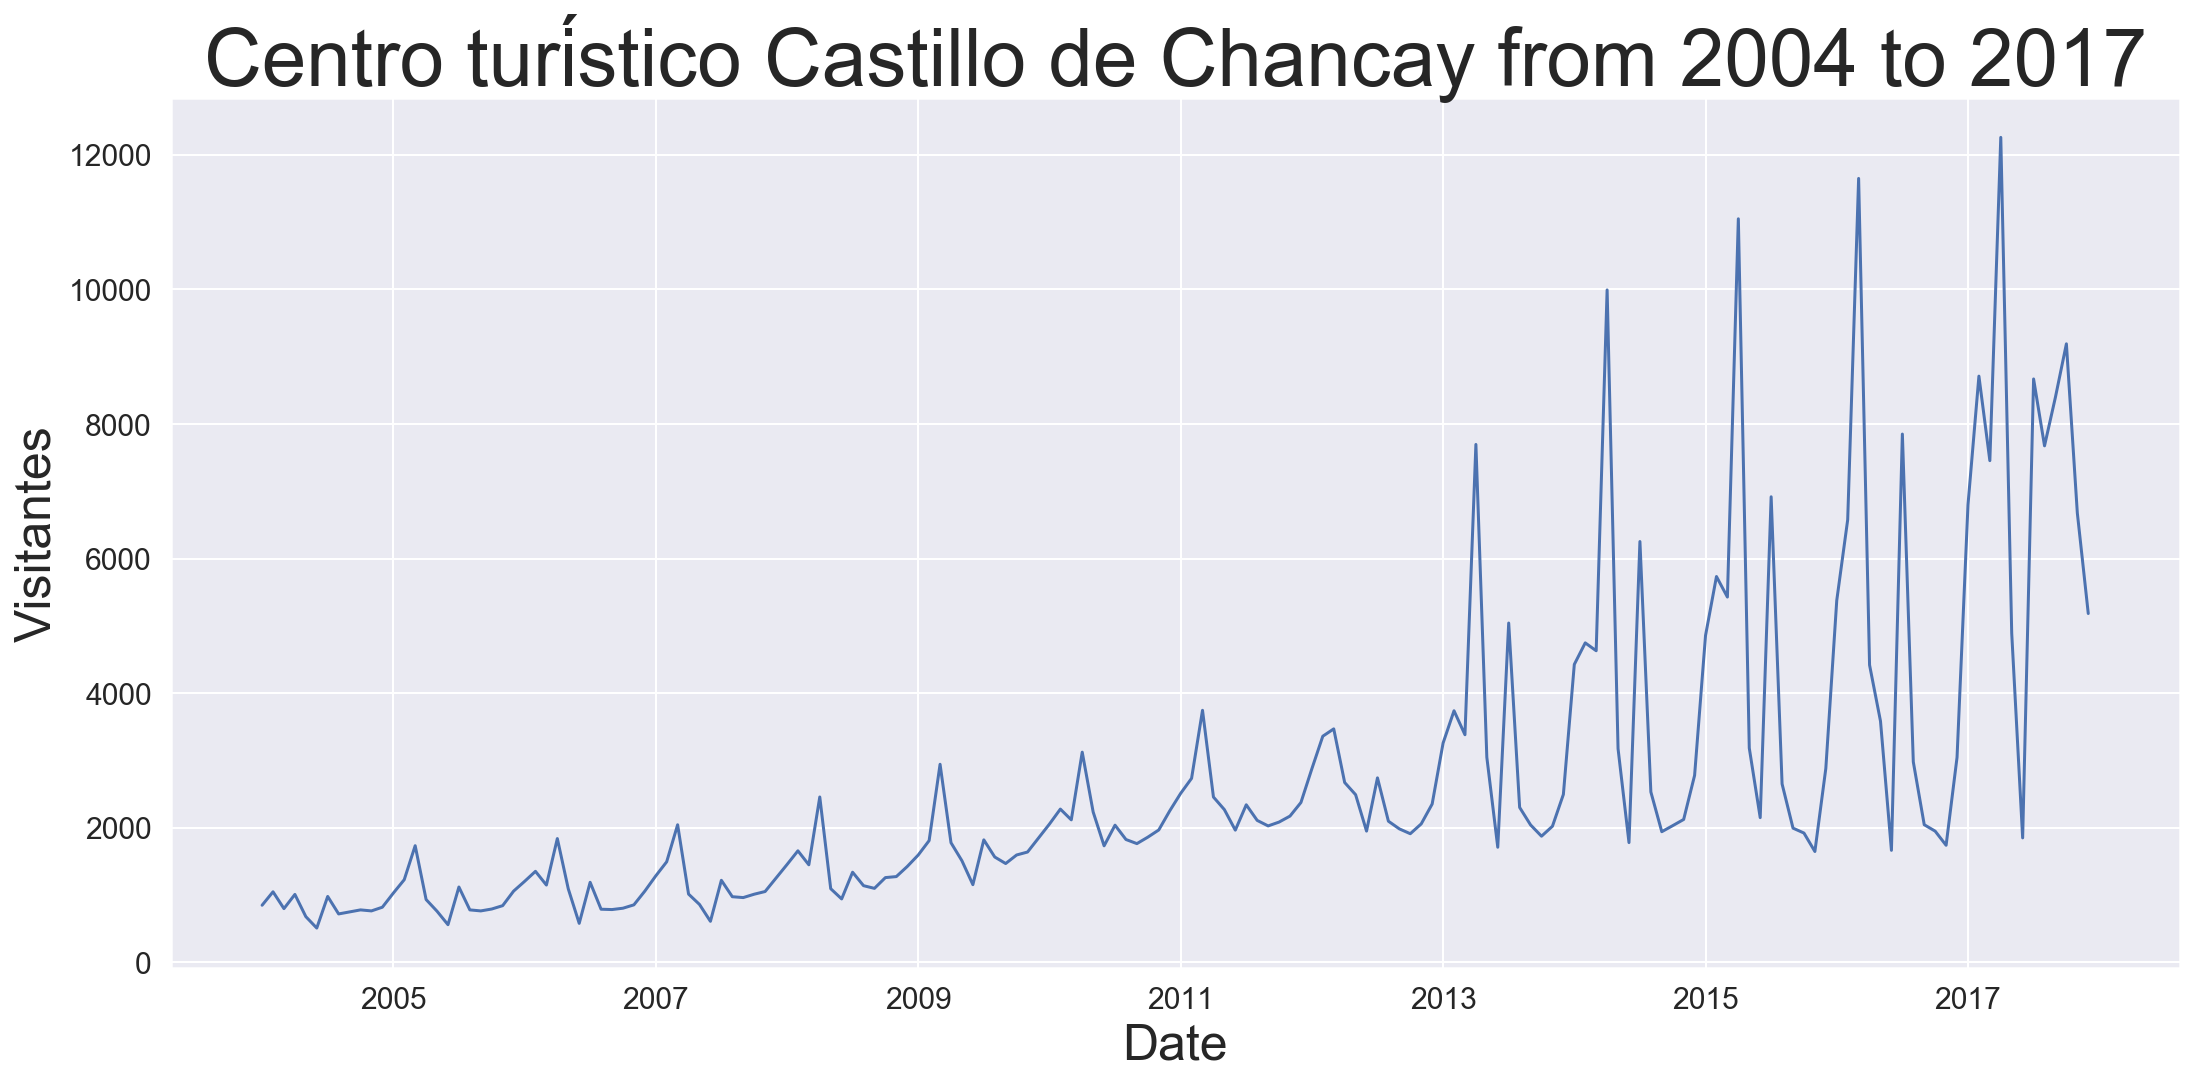

In [224]:
chancay = clean_excel_to_dataframe('Centro turístico Castillo de Chancay.xls','rptaniomes3',ski=4)
chancay.plot()
plt.ylabel('Visitantes')
plt.title('Centro turístico Castillo de Chancay from 2004 to 2017')
plt.show();

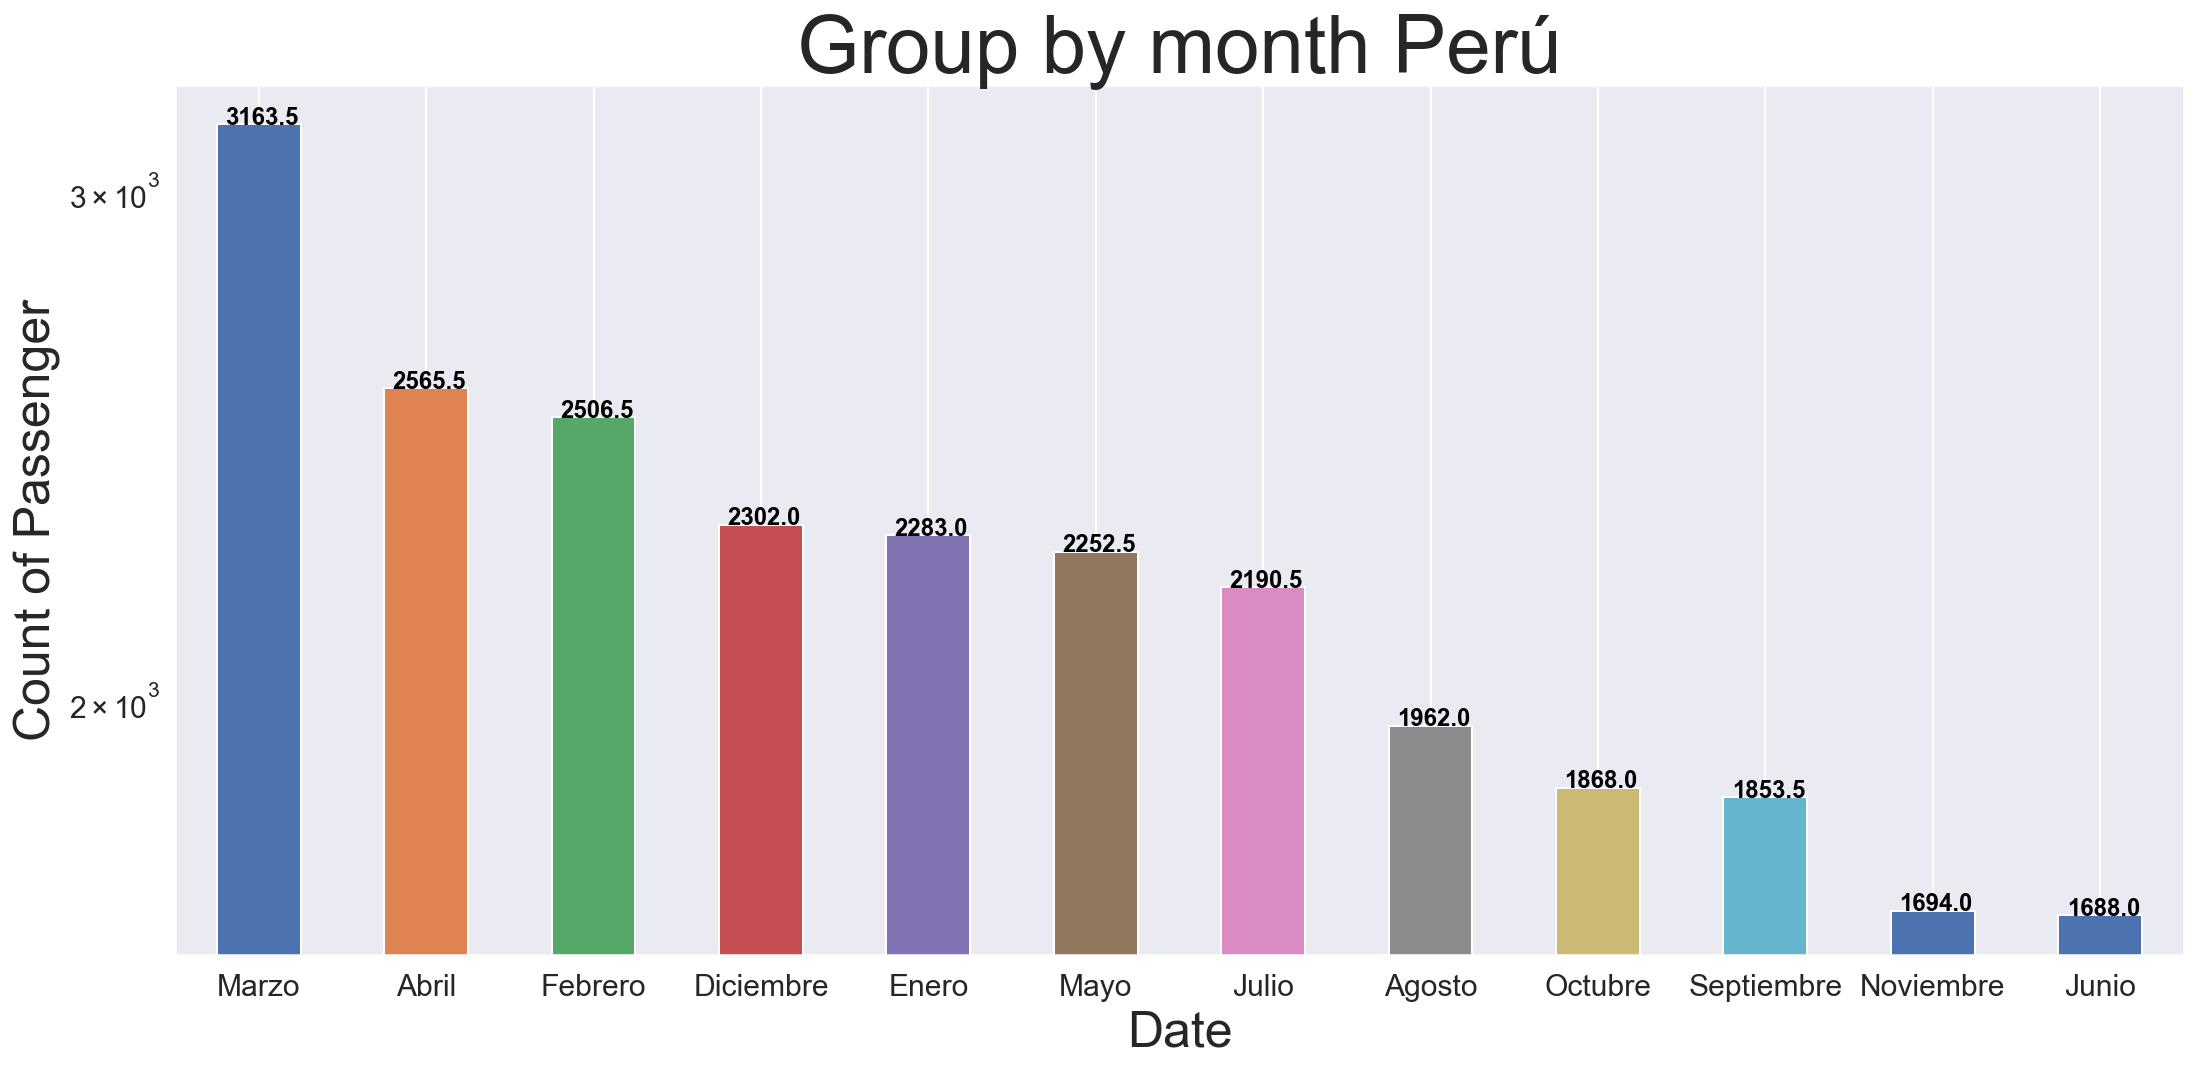

In [225]:
bar_plot(chancay)

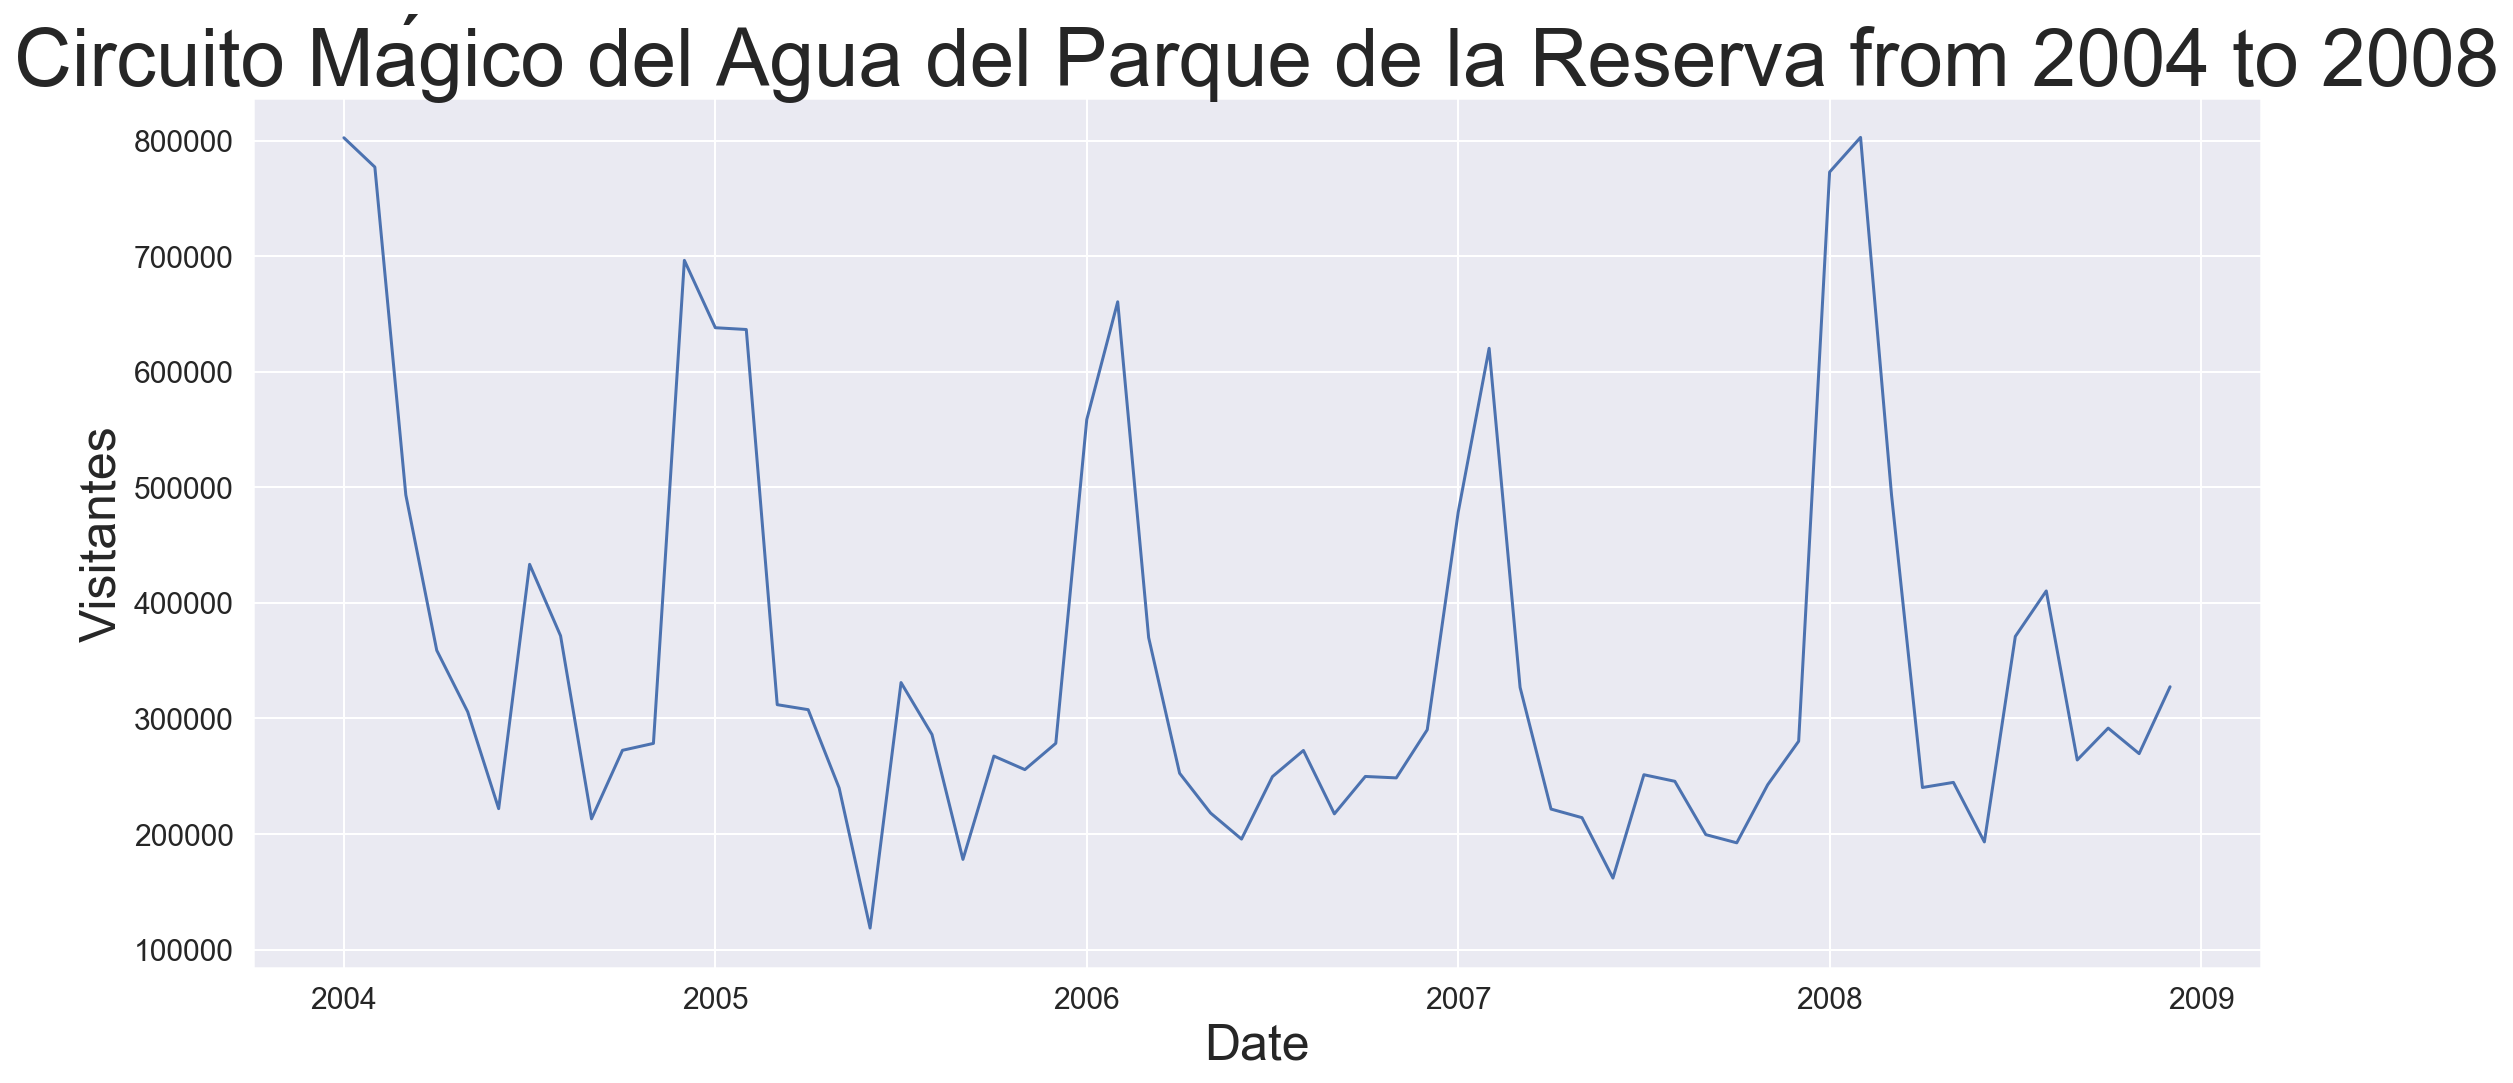

In [226]:
parque_reserva = clean_excel_to_dataframe('Circuito Mágico del Agua del Parque de la Reserva.xls',
                                   'rptaniomes',ski=3)
parque_reserva.plot()
plt.ylabel('Visitantes')
plt.title('Circuito Mágico del Agua del Parque de la Reserva from 2004 to 2008')
plt.show();

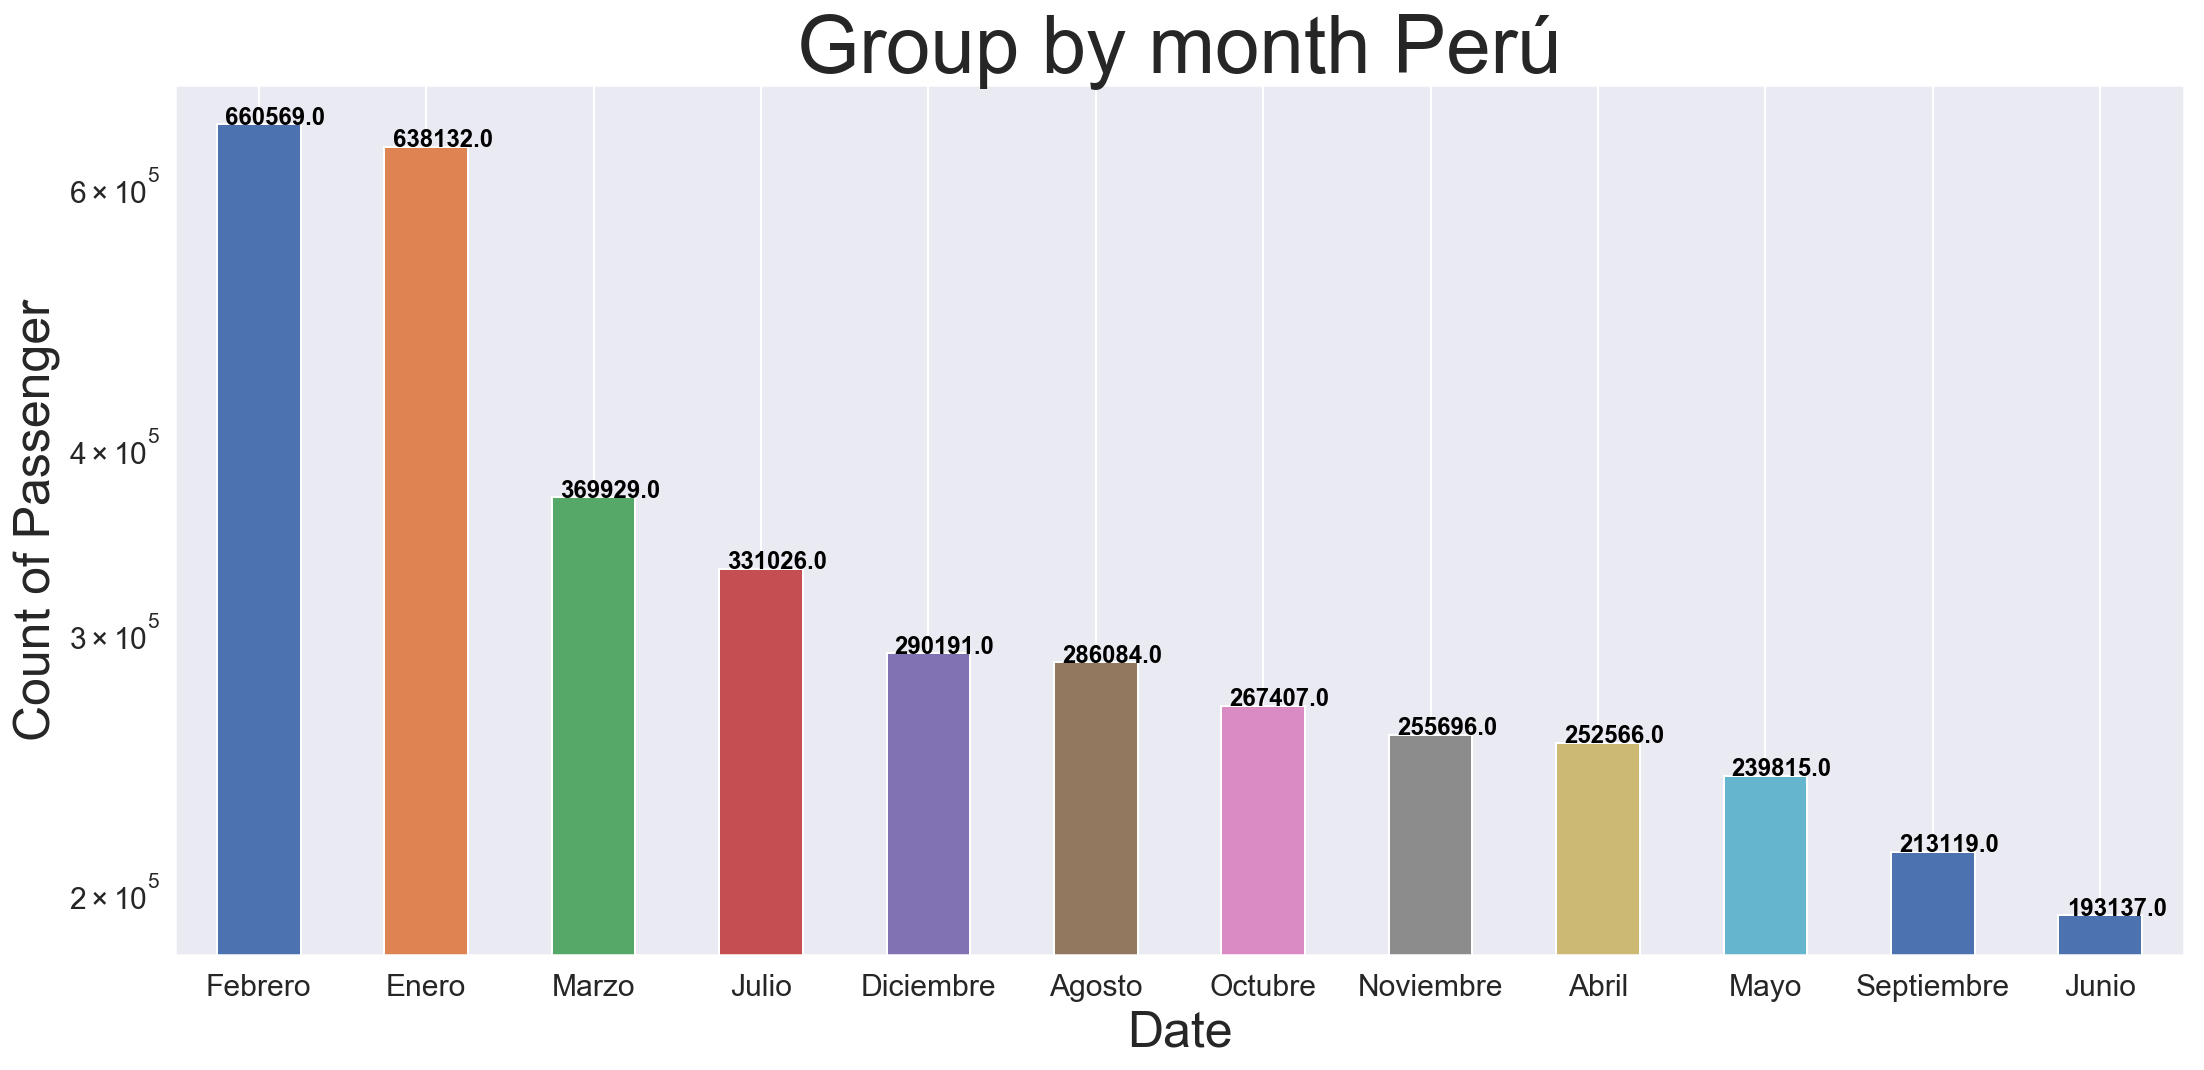

In [227]:
bar_plot(parque_reserva)

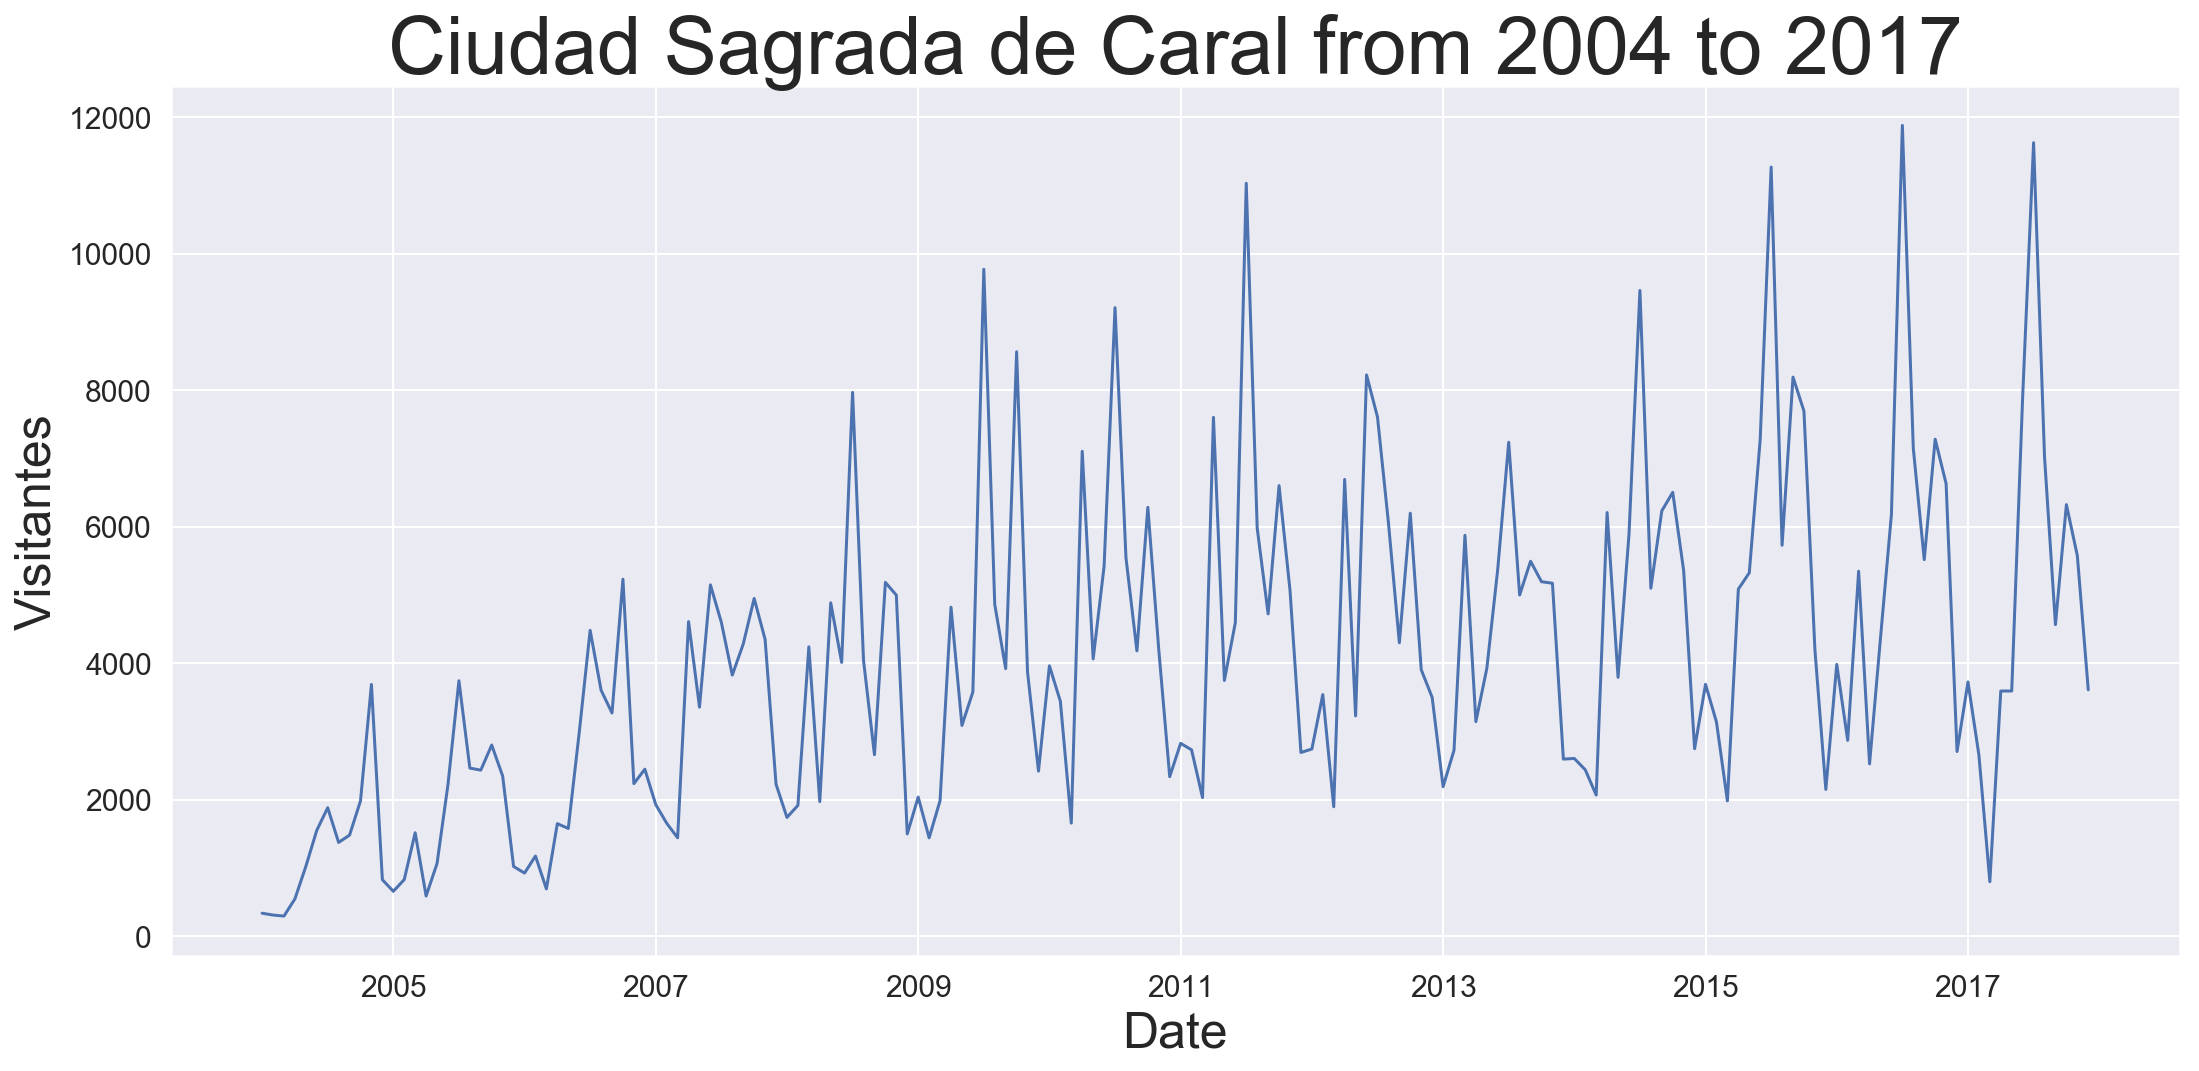

In [228]:
caral = clean_excel_to_dataframe('Ciudad Sagrada de Caral.xls',
                                   'rptaniomes3',ski=4)
caral.plot()
plt.ylabel('Visitantes')
plt.title('Ciudad Sagrada de Caral from 2004 to 2017')
plt.show();

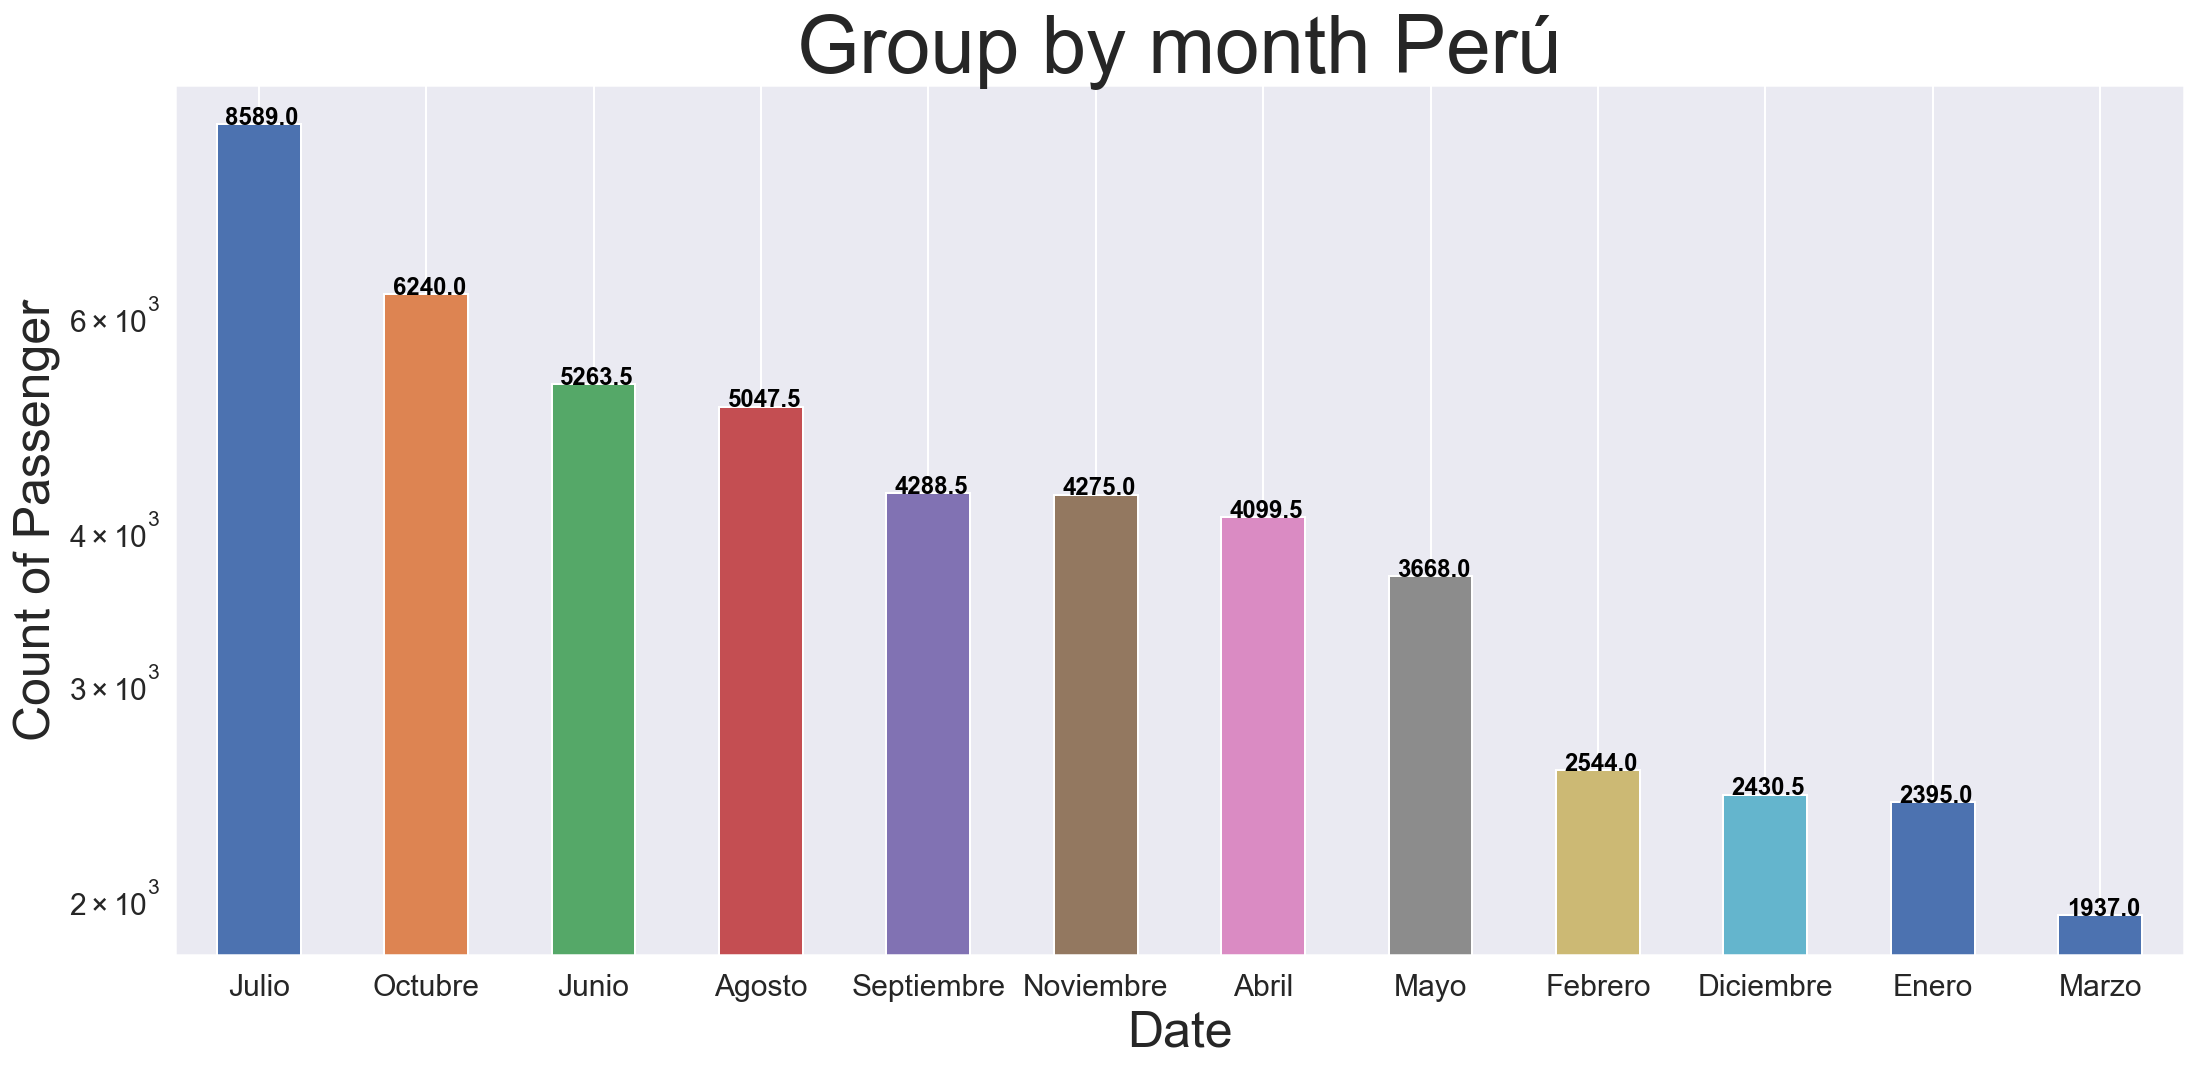

In [229]:
bar_plot(caral)

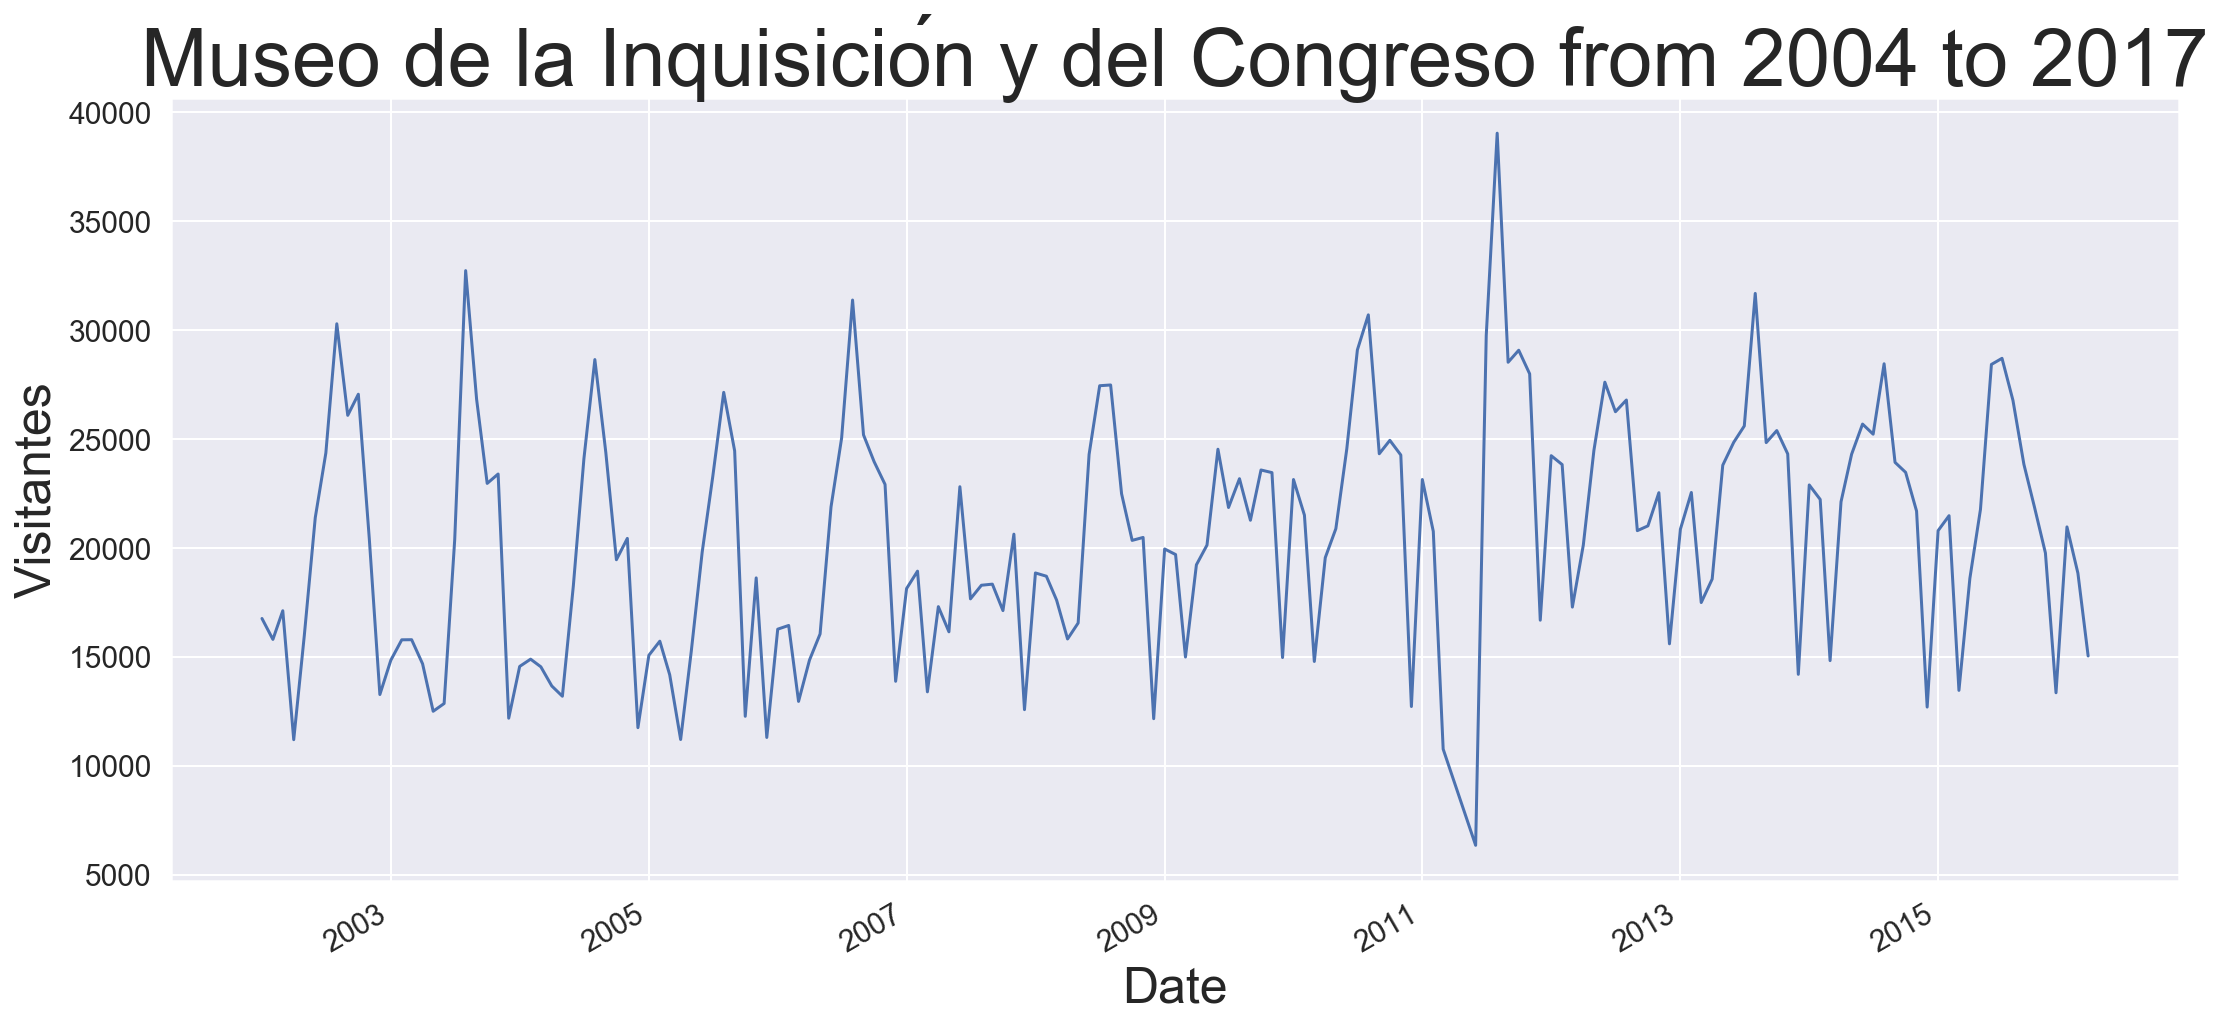

In [231]:
inquisicion = clean_excel_to_dataframe('Museo de la Inquisición y del Congreso.xls',
                                   'rptaniomes3',ski=4,year=2002)
inquisicion = inquisicion[inquisicion>0]
inquisicion = inquisicion[:-1]
inquisicion.plot()
plt.ylabel('Visitantes')
plt.title('Museo de la Inquisición y del Congreso from 2004 to 2017')
plt.show();

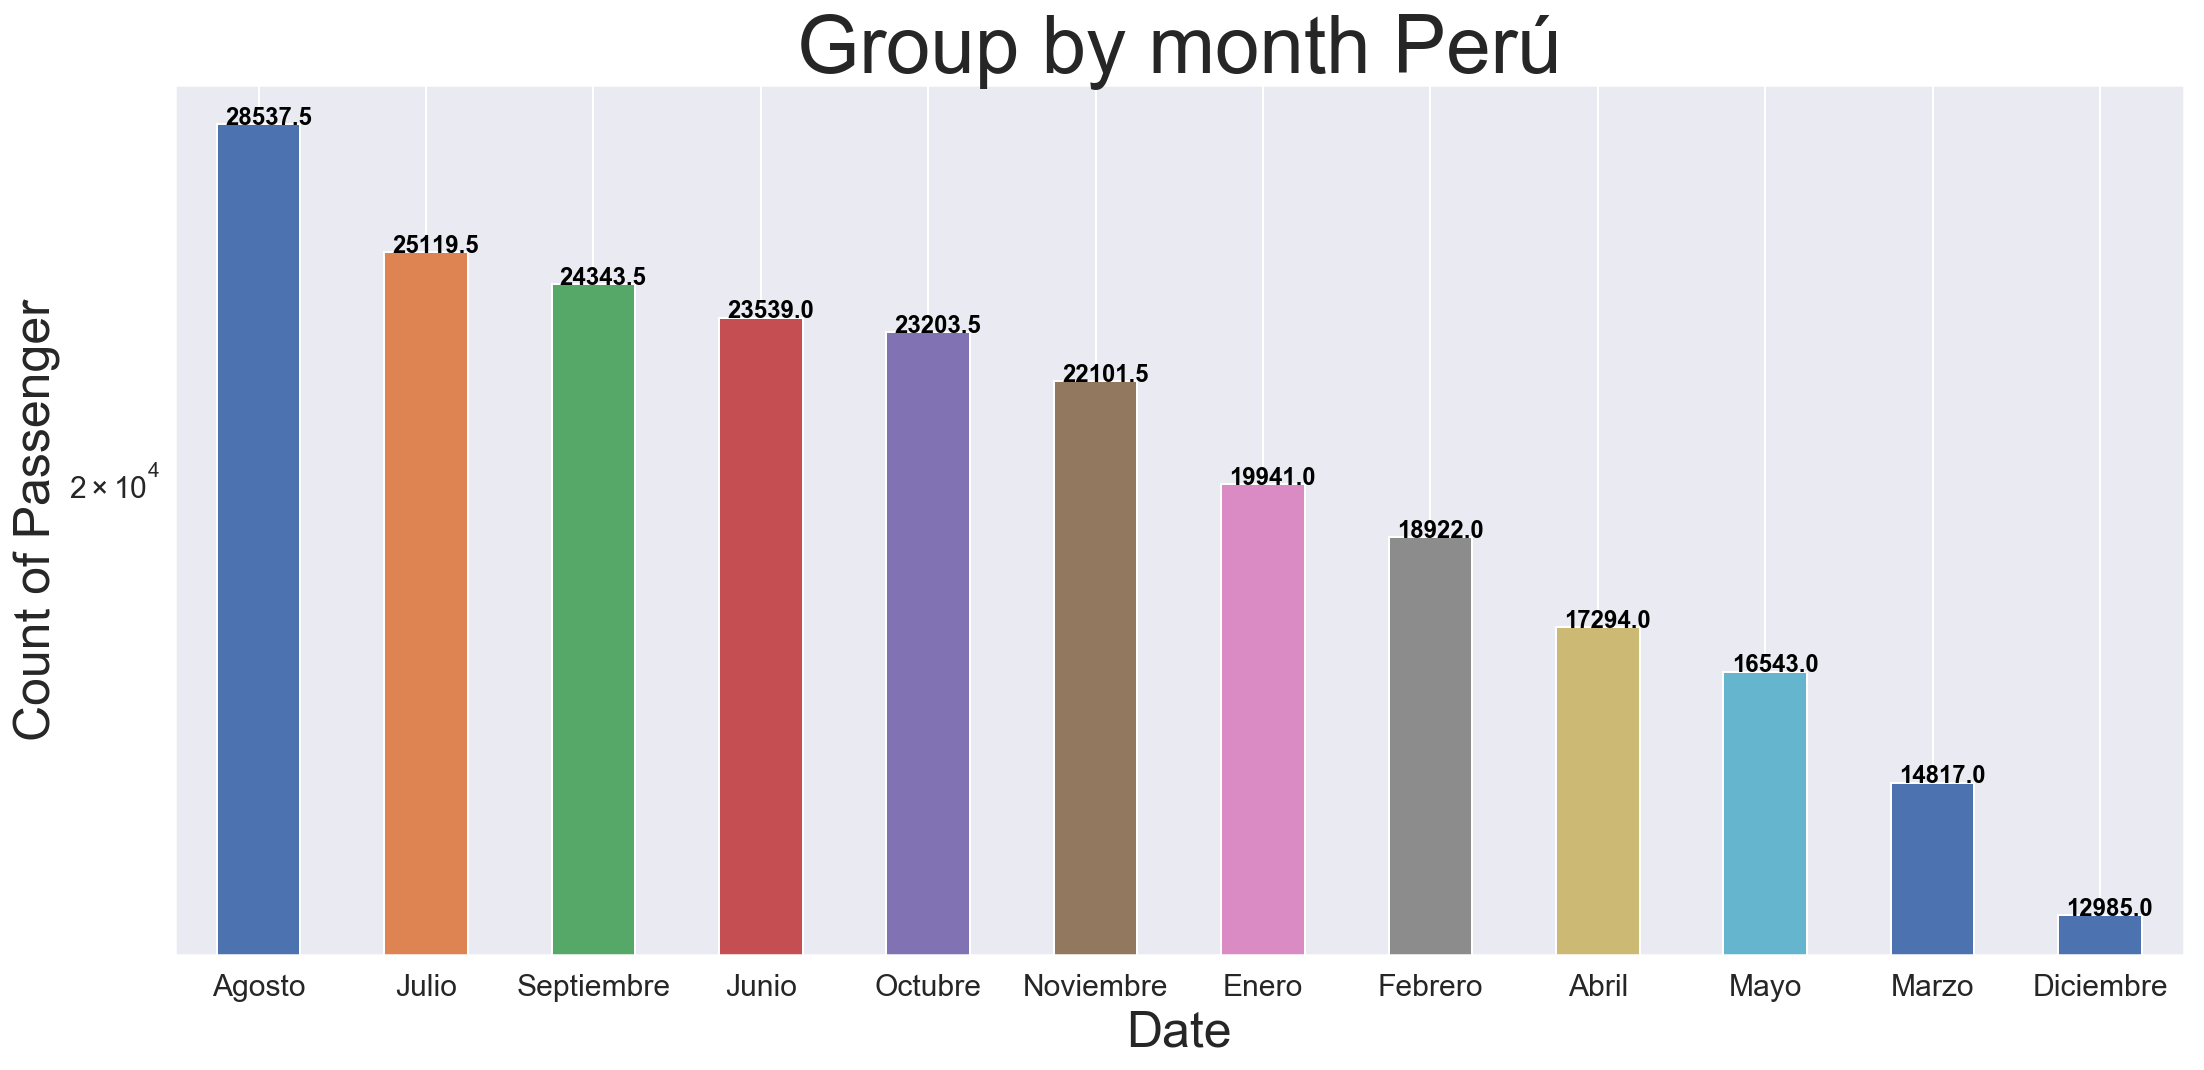

In [232]:
bar_plot(inquisicion)

In [209]:
def clean_excel_to_dataframe2(nameExcel,nameSheet,ski):
    df = iqutos_FAP = pd.read_excel(nameExcel,sheet_name=nameSheet,nrows=12,
                           skiprows=ski,index_col=0,)
    drop = df.columns.str.contains('Total')
    if drop != []:
        df = df.drop(df.columns[drop],axis=1)
    df['month'] = df.index.map(dic)
    df_ = pd.melt(df,id_vars=['month'],var_name=['year'])
    df_.year = df_.year.astype(int)
    df_['Date'] = df_.apply(lambda row:pd.datetime(int(row['year']),int(row['month']),1), axis=1)
    return df_.set_index('Date')['value']

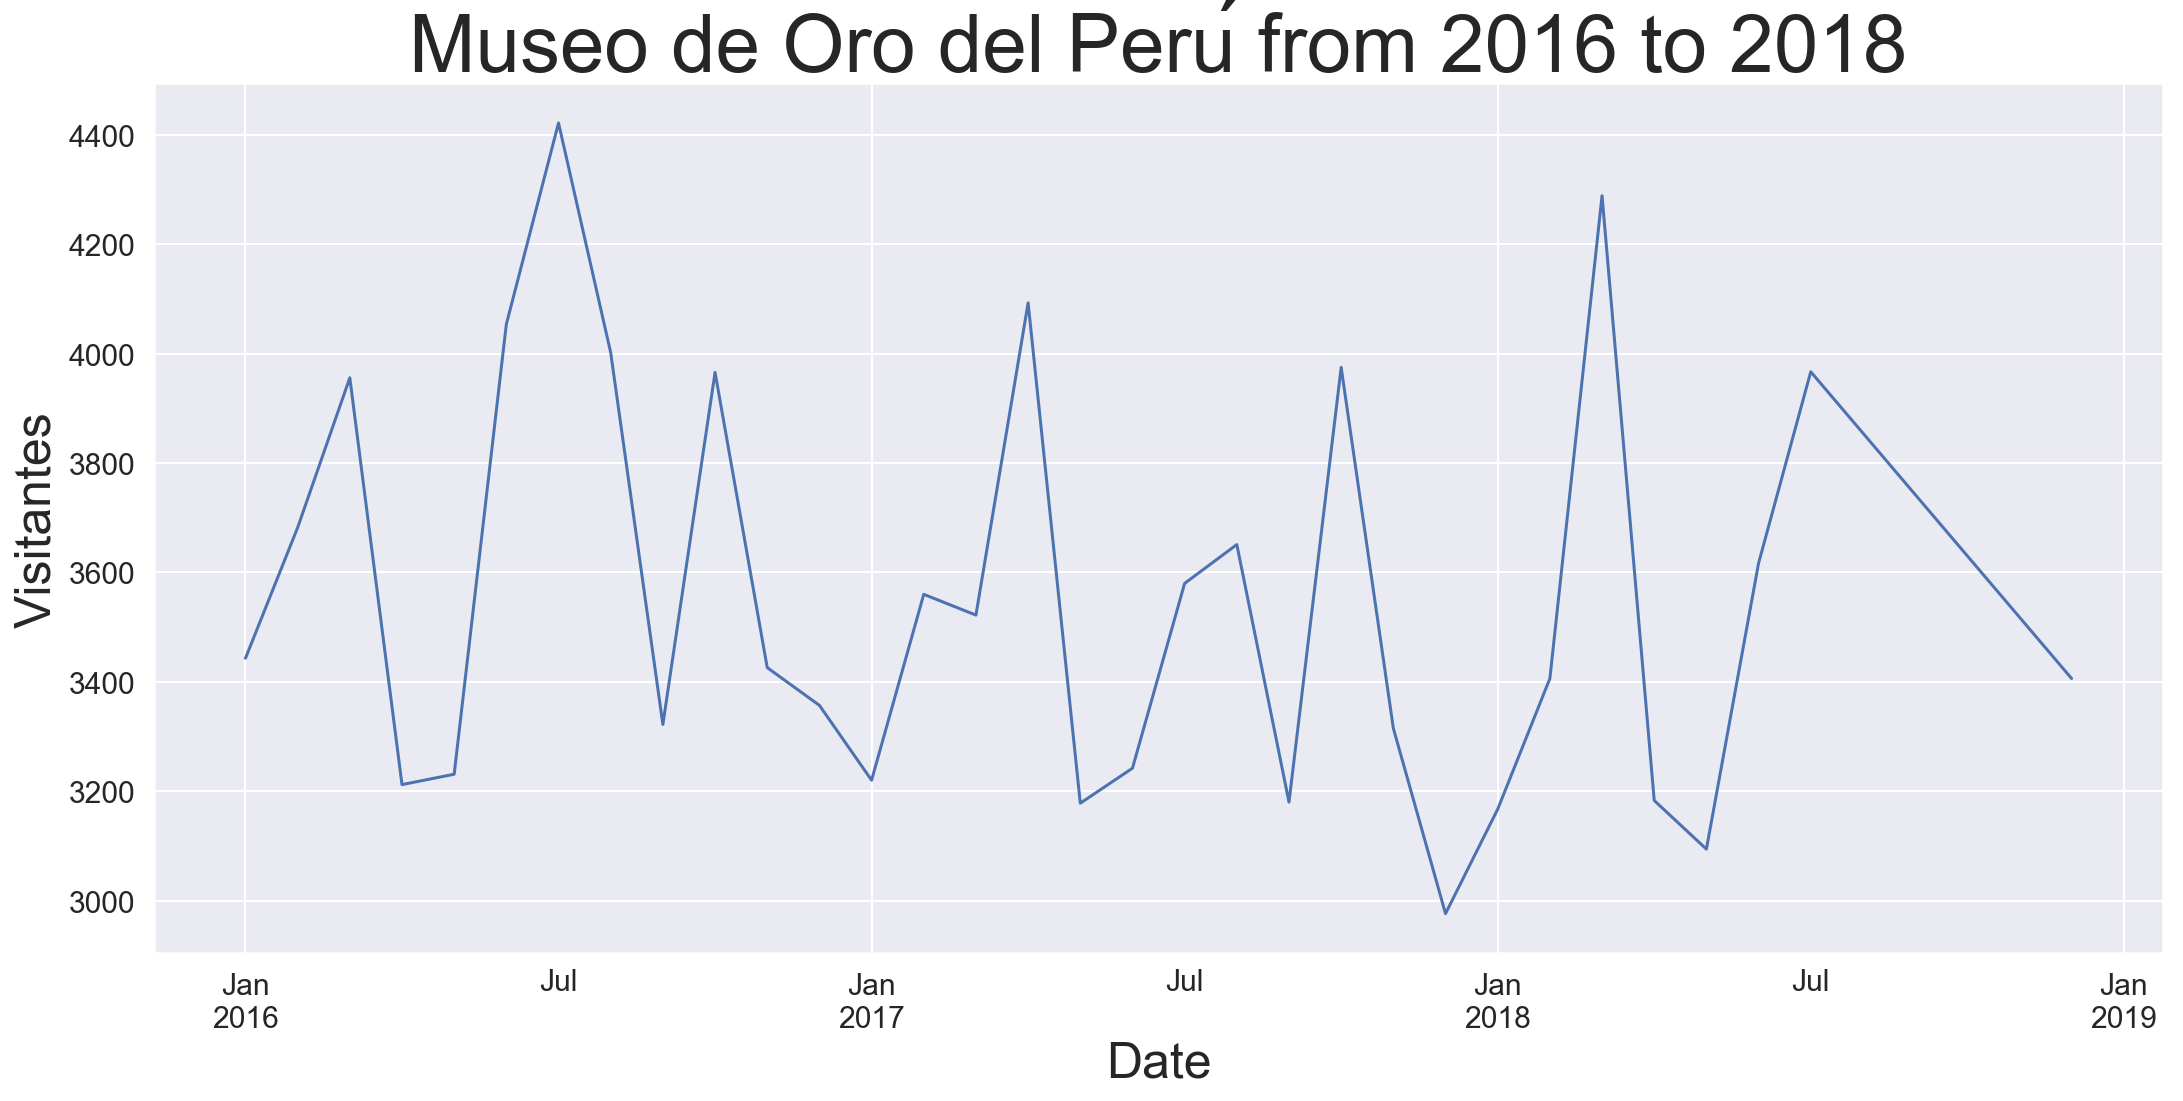

In [233]:
oro = clean_excel_to_dataframe2('Museo de Oro del Perú.xls',
                                   'rptaniomes',ski=3)
oro = oro[oro.index.year>=2016]
oro.iloc[-1] = oro[oro.index.year==2018].median()
oro = oro.interpolate()
oro.plot()
plt.ylabel('Visitantes')
plt.title('Museo de Oro del Perú from 2016 to 2018')
plt.show();

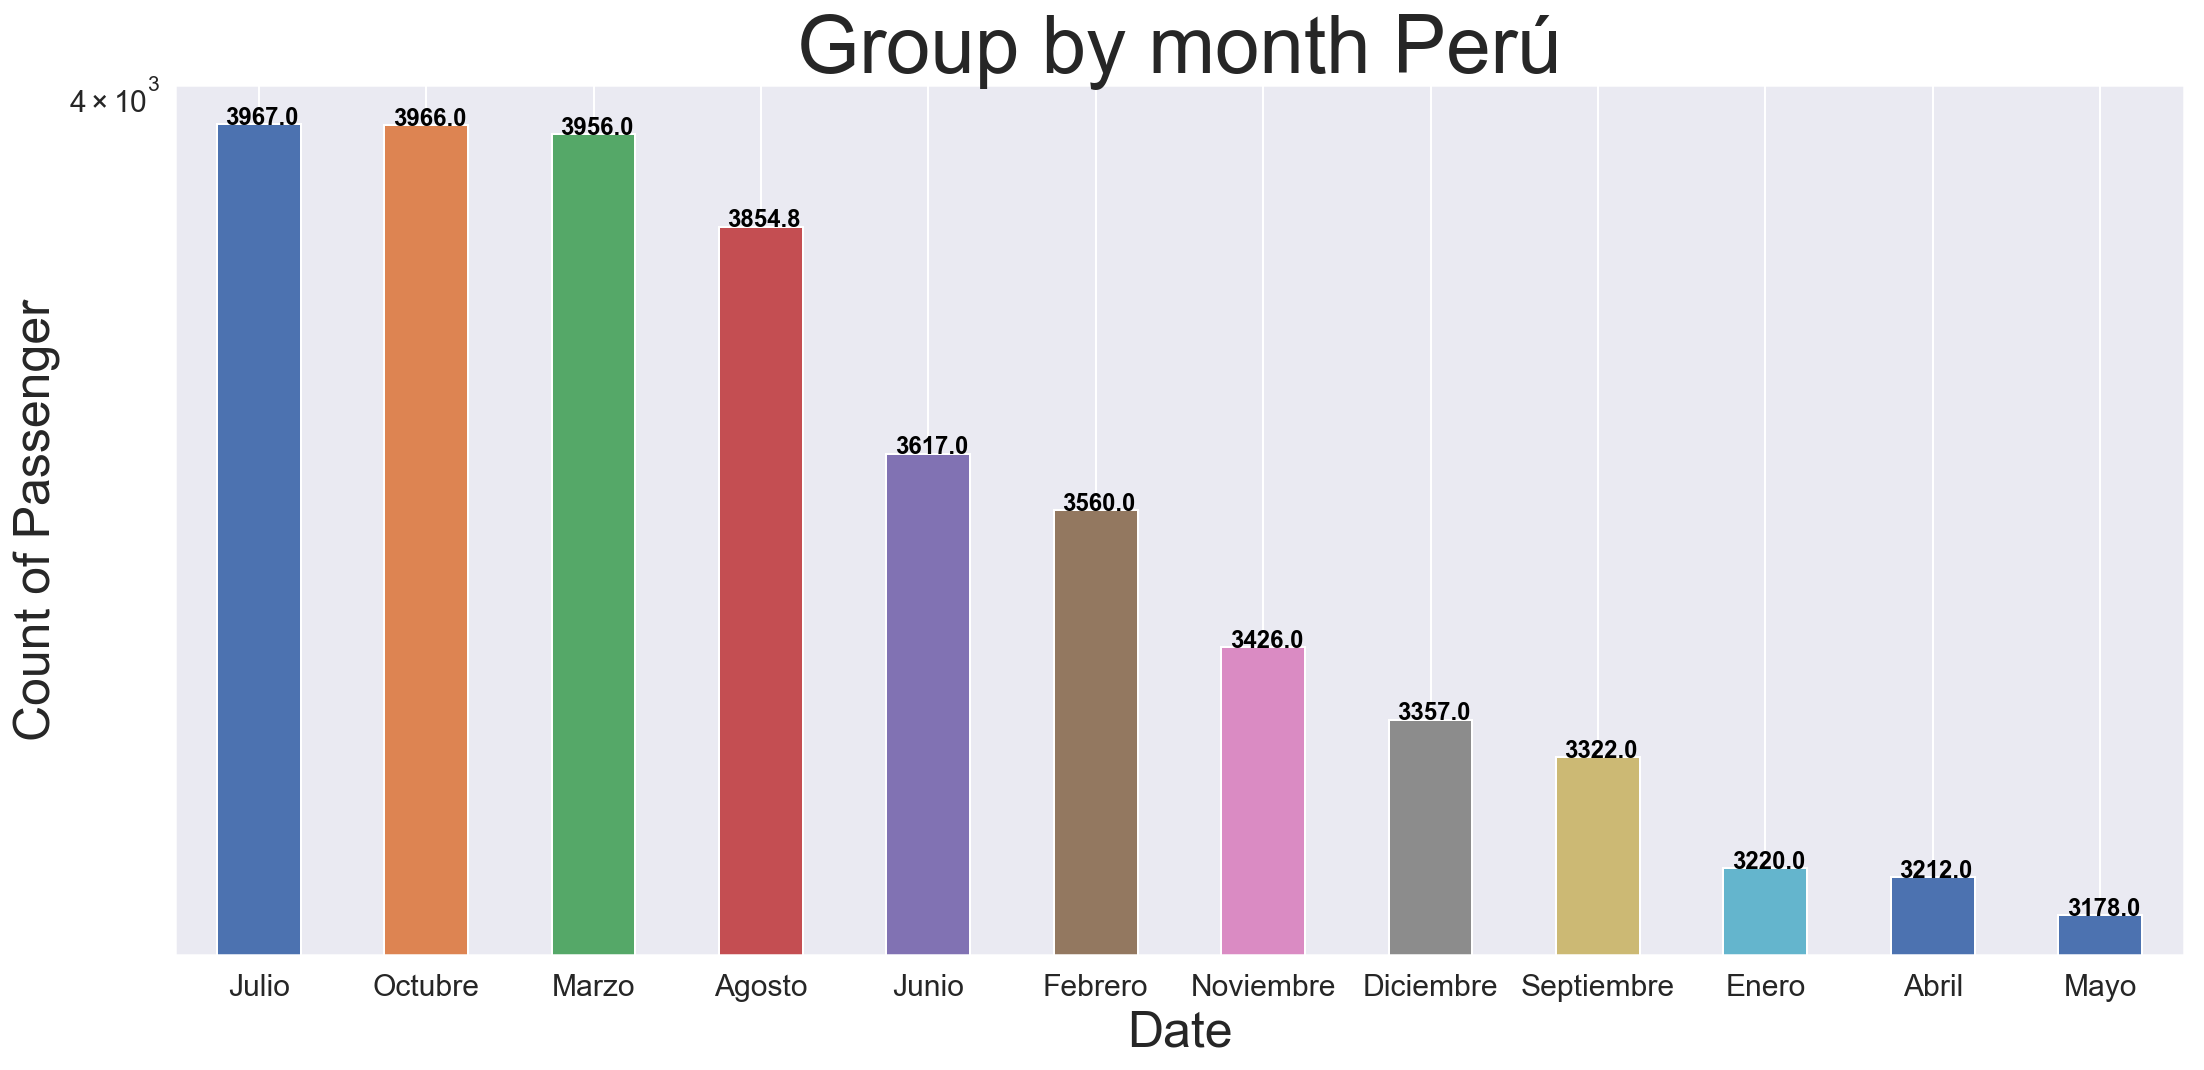

In [234]:
bar_plot(oro)

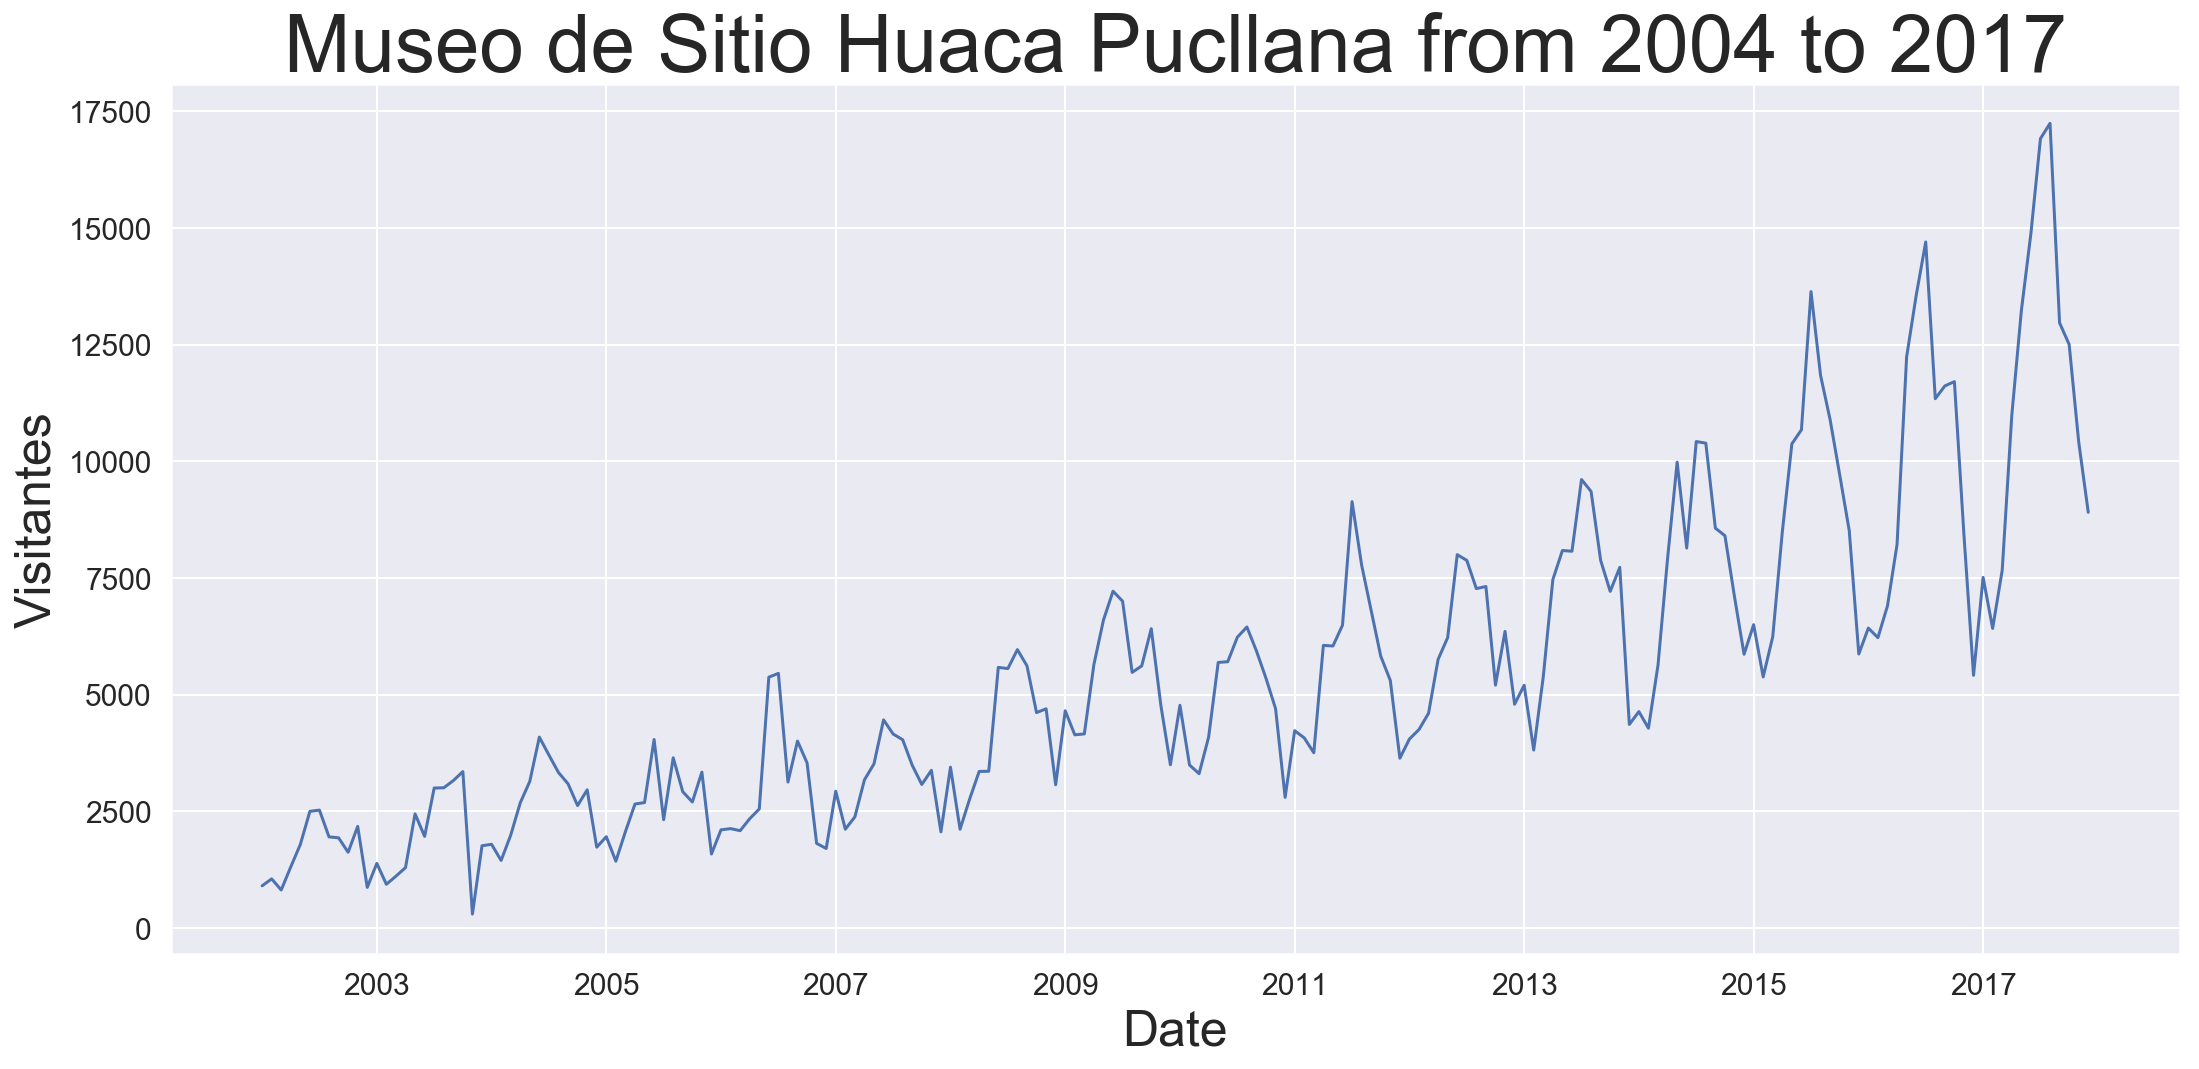

In [235]:
pucllana = clean_excel_to_dataframe('Museo de Sitio Huaca Pucllana.xls',
                                   'rptaniomes3',ski=4,year=2002)
pucllana.plot()
plt.ylabel('Visitantes')
plt.title('Museo de Sitio Huaca Pucllana from 2004 to 2017')
plt.show();

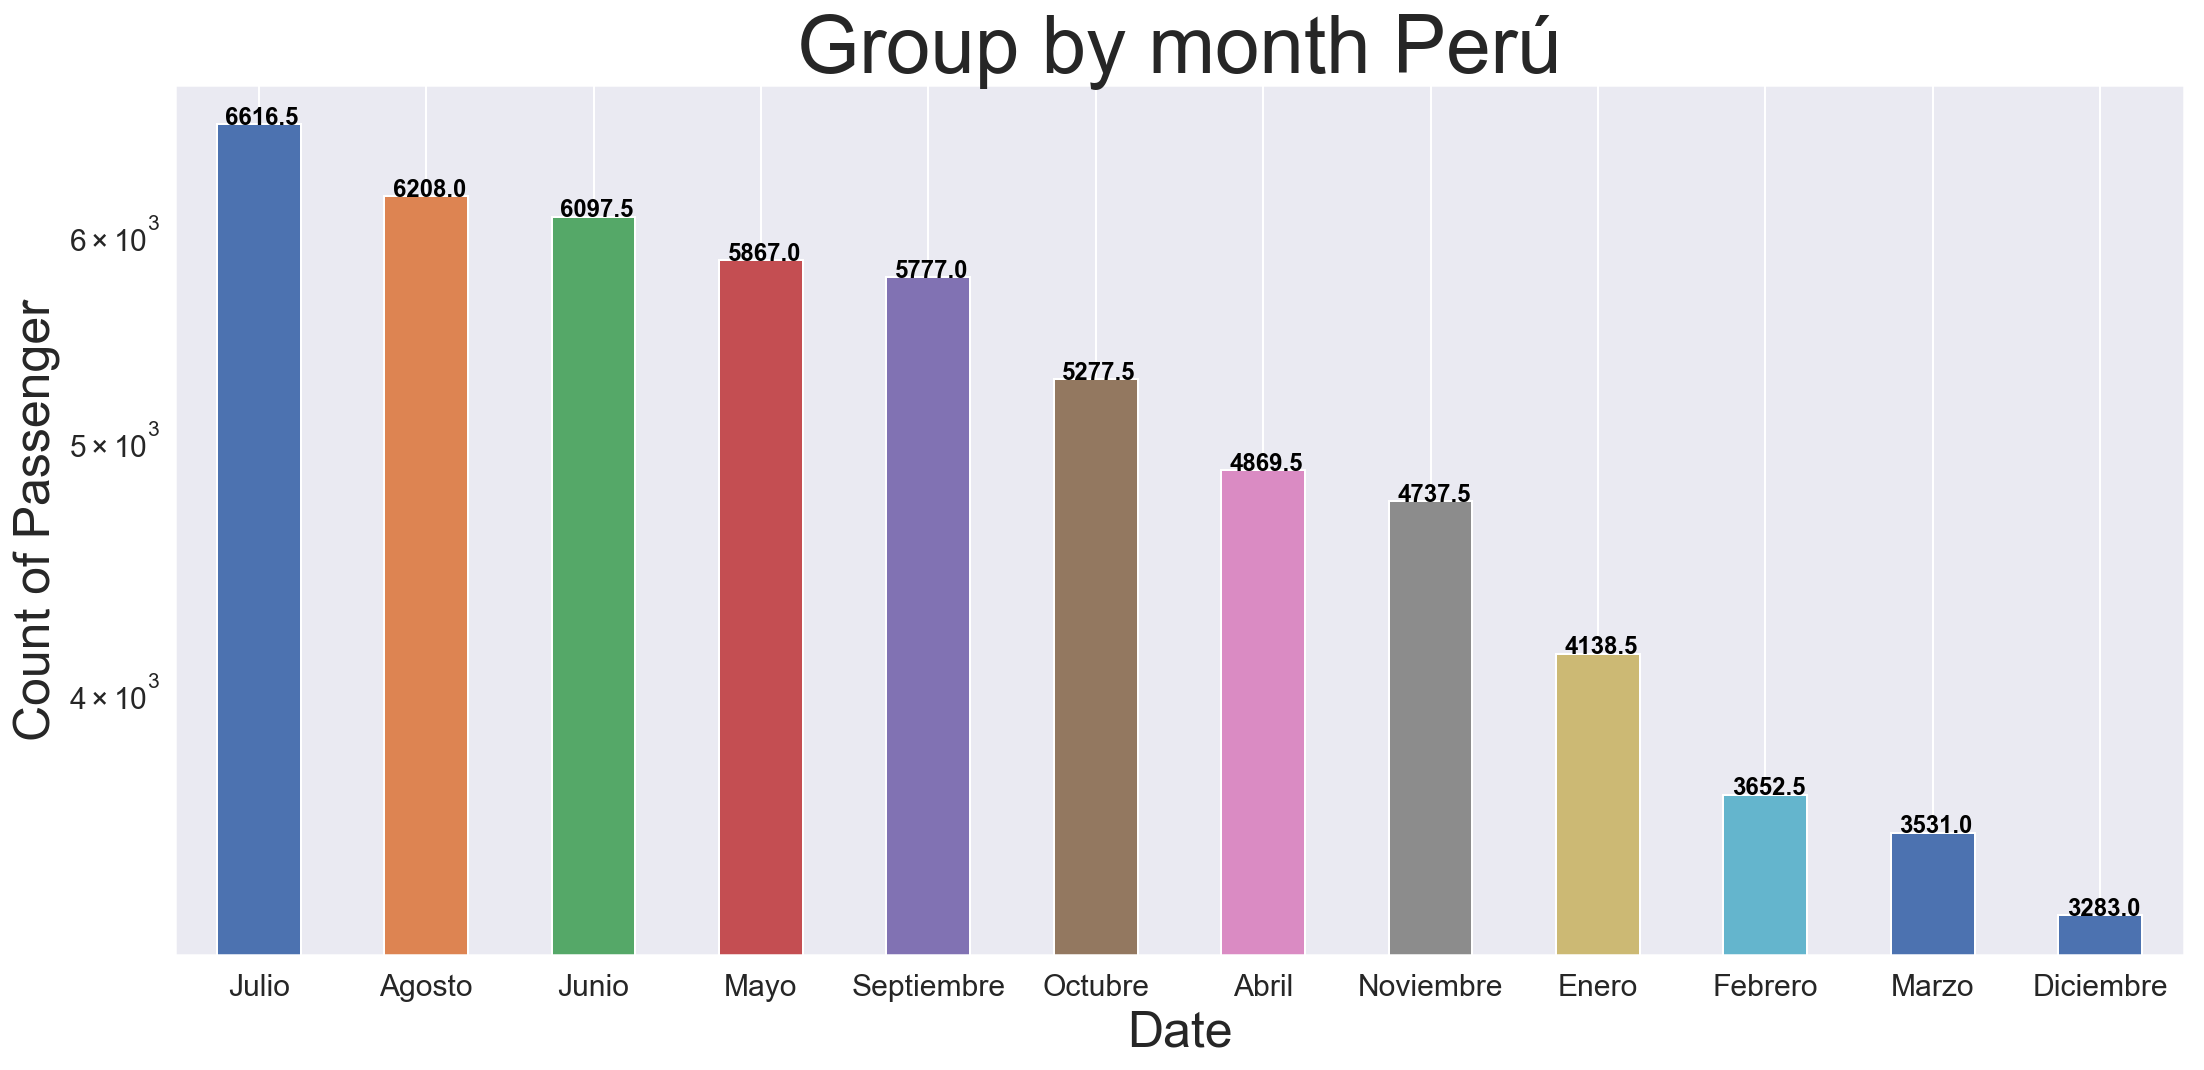

In [236]:
bar_plot(pucllana)

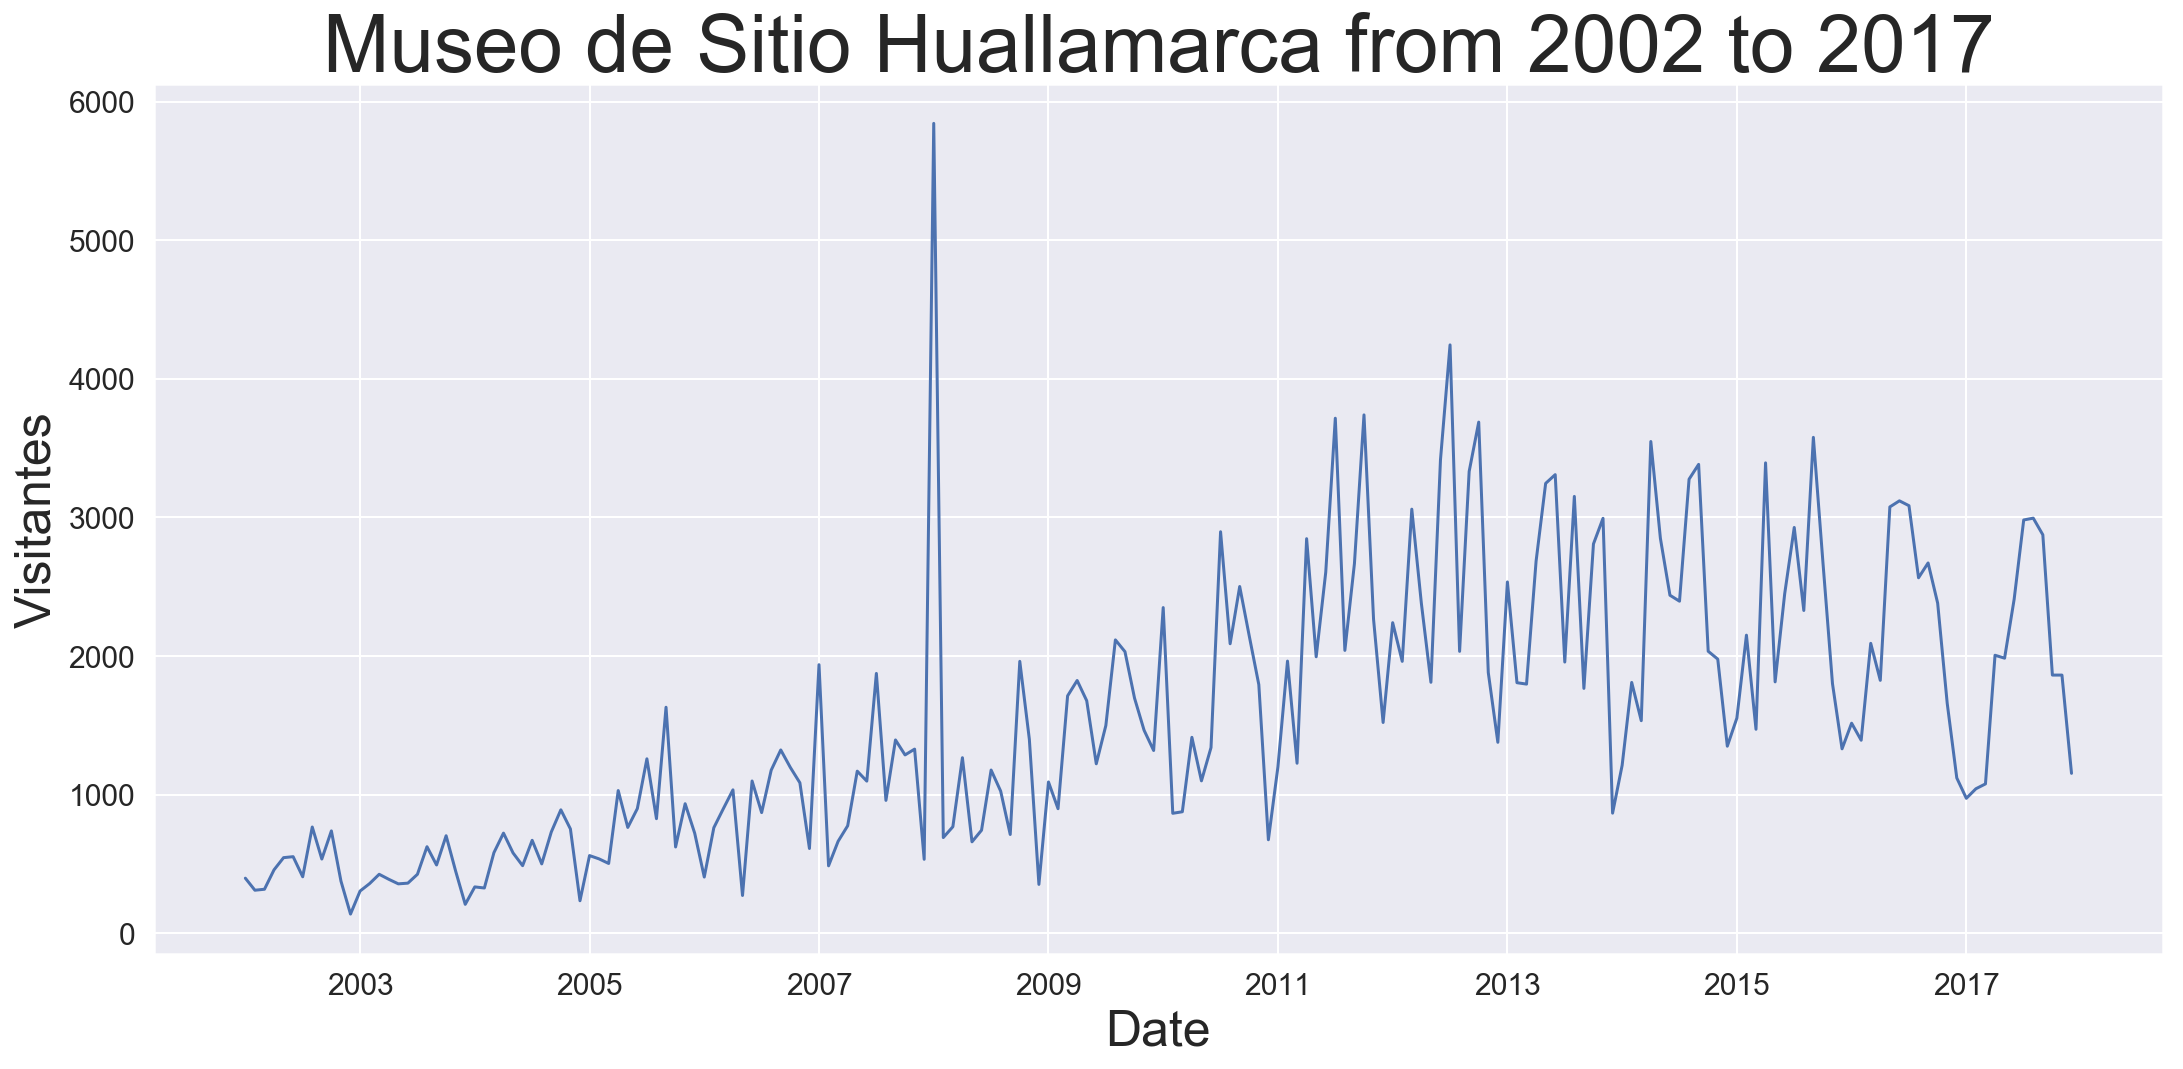

In [237]:
Huallamarca = clean_excel_to_dataframe('Museo de Sitio Huallamarca.xls',
                                   'rptaniomes3',ski=4,year=2002)
Huallamarca.plot()
plt.ylabel('Visitantes')
plt.title('Museo de Sitio Huallamarca from 2002 to 2017')
plt.show();

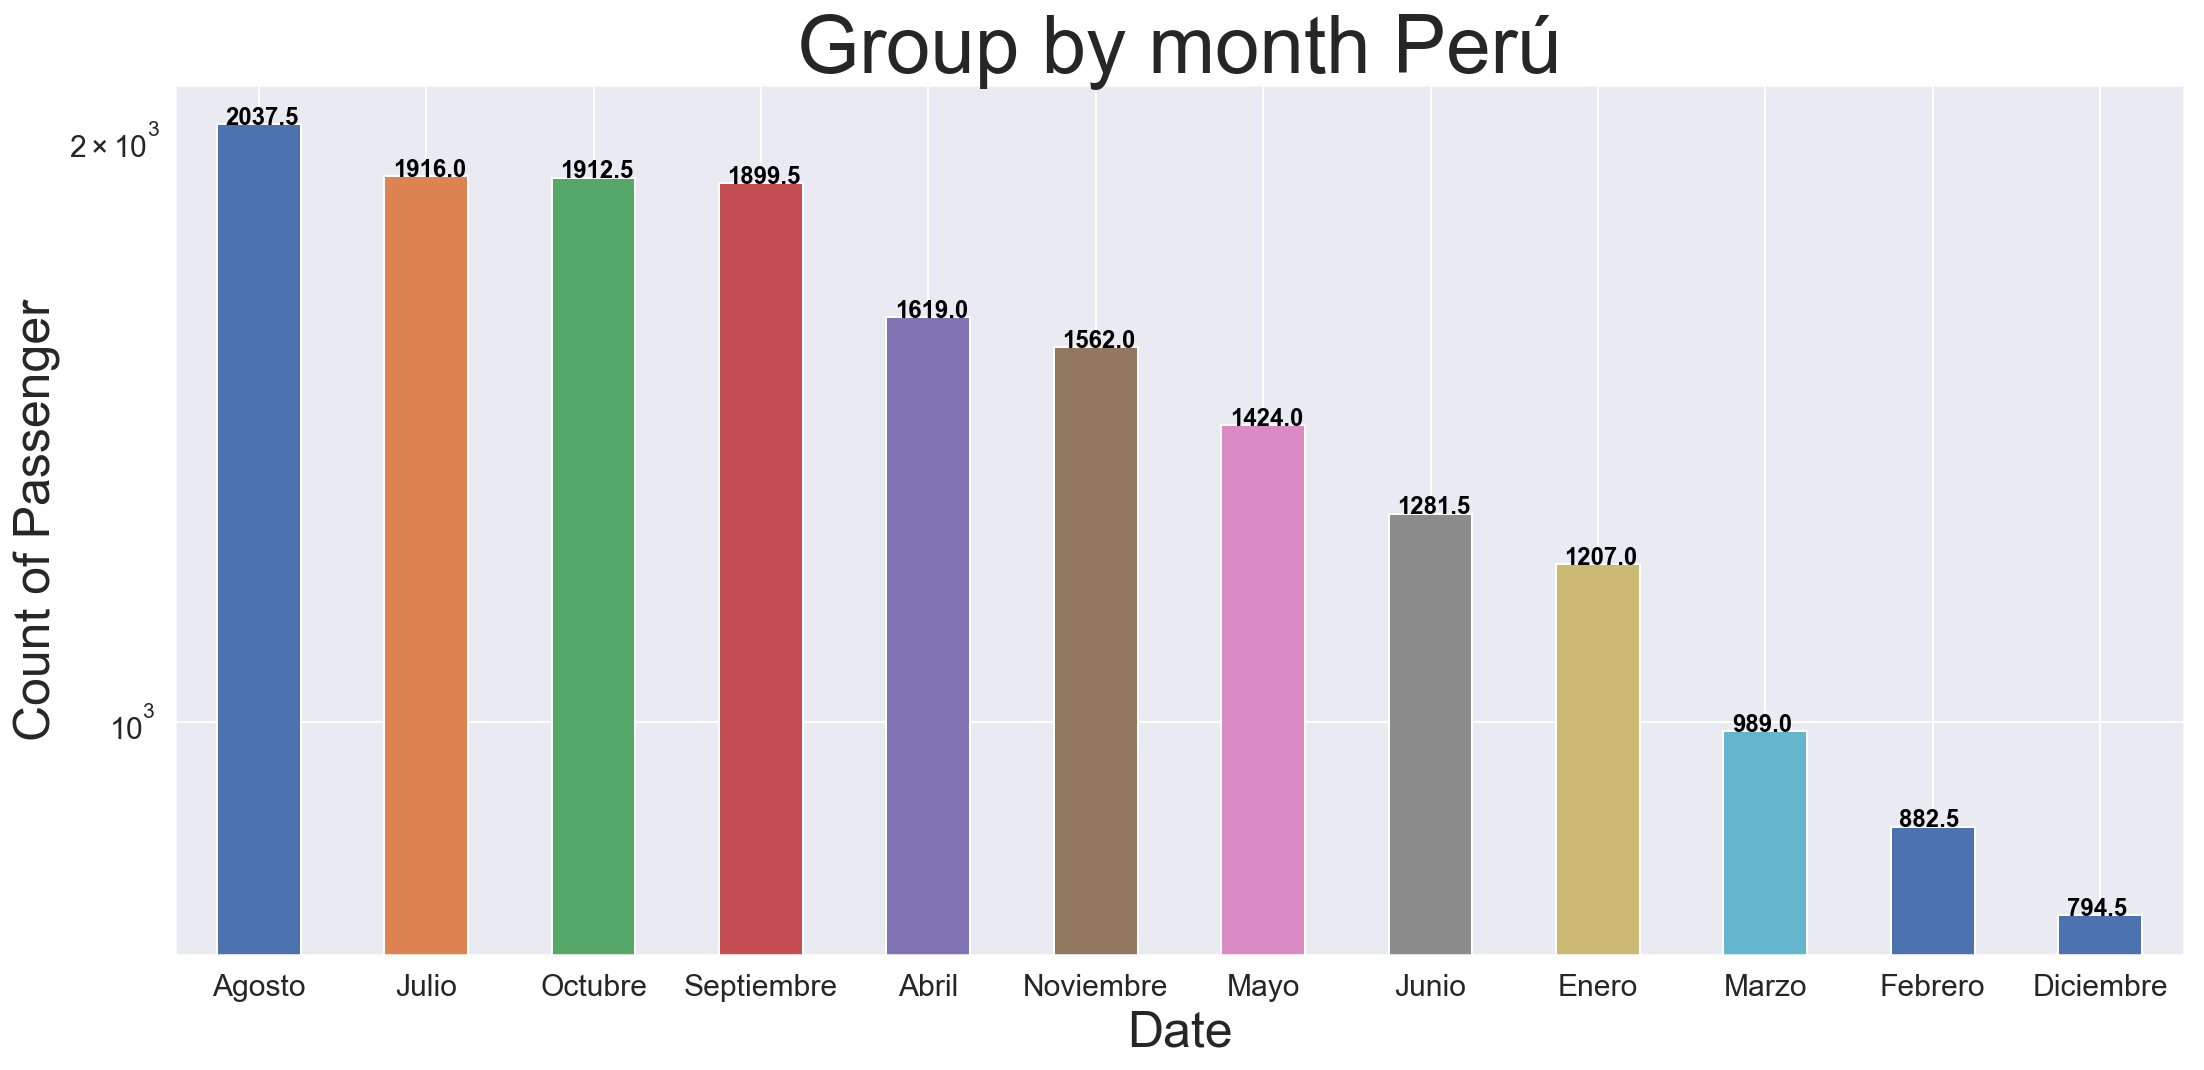

In [238]:
bar_plot(Huallamarca)

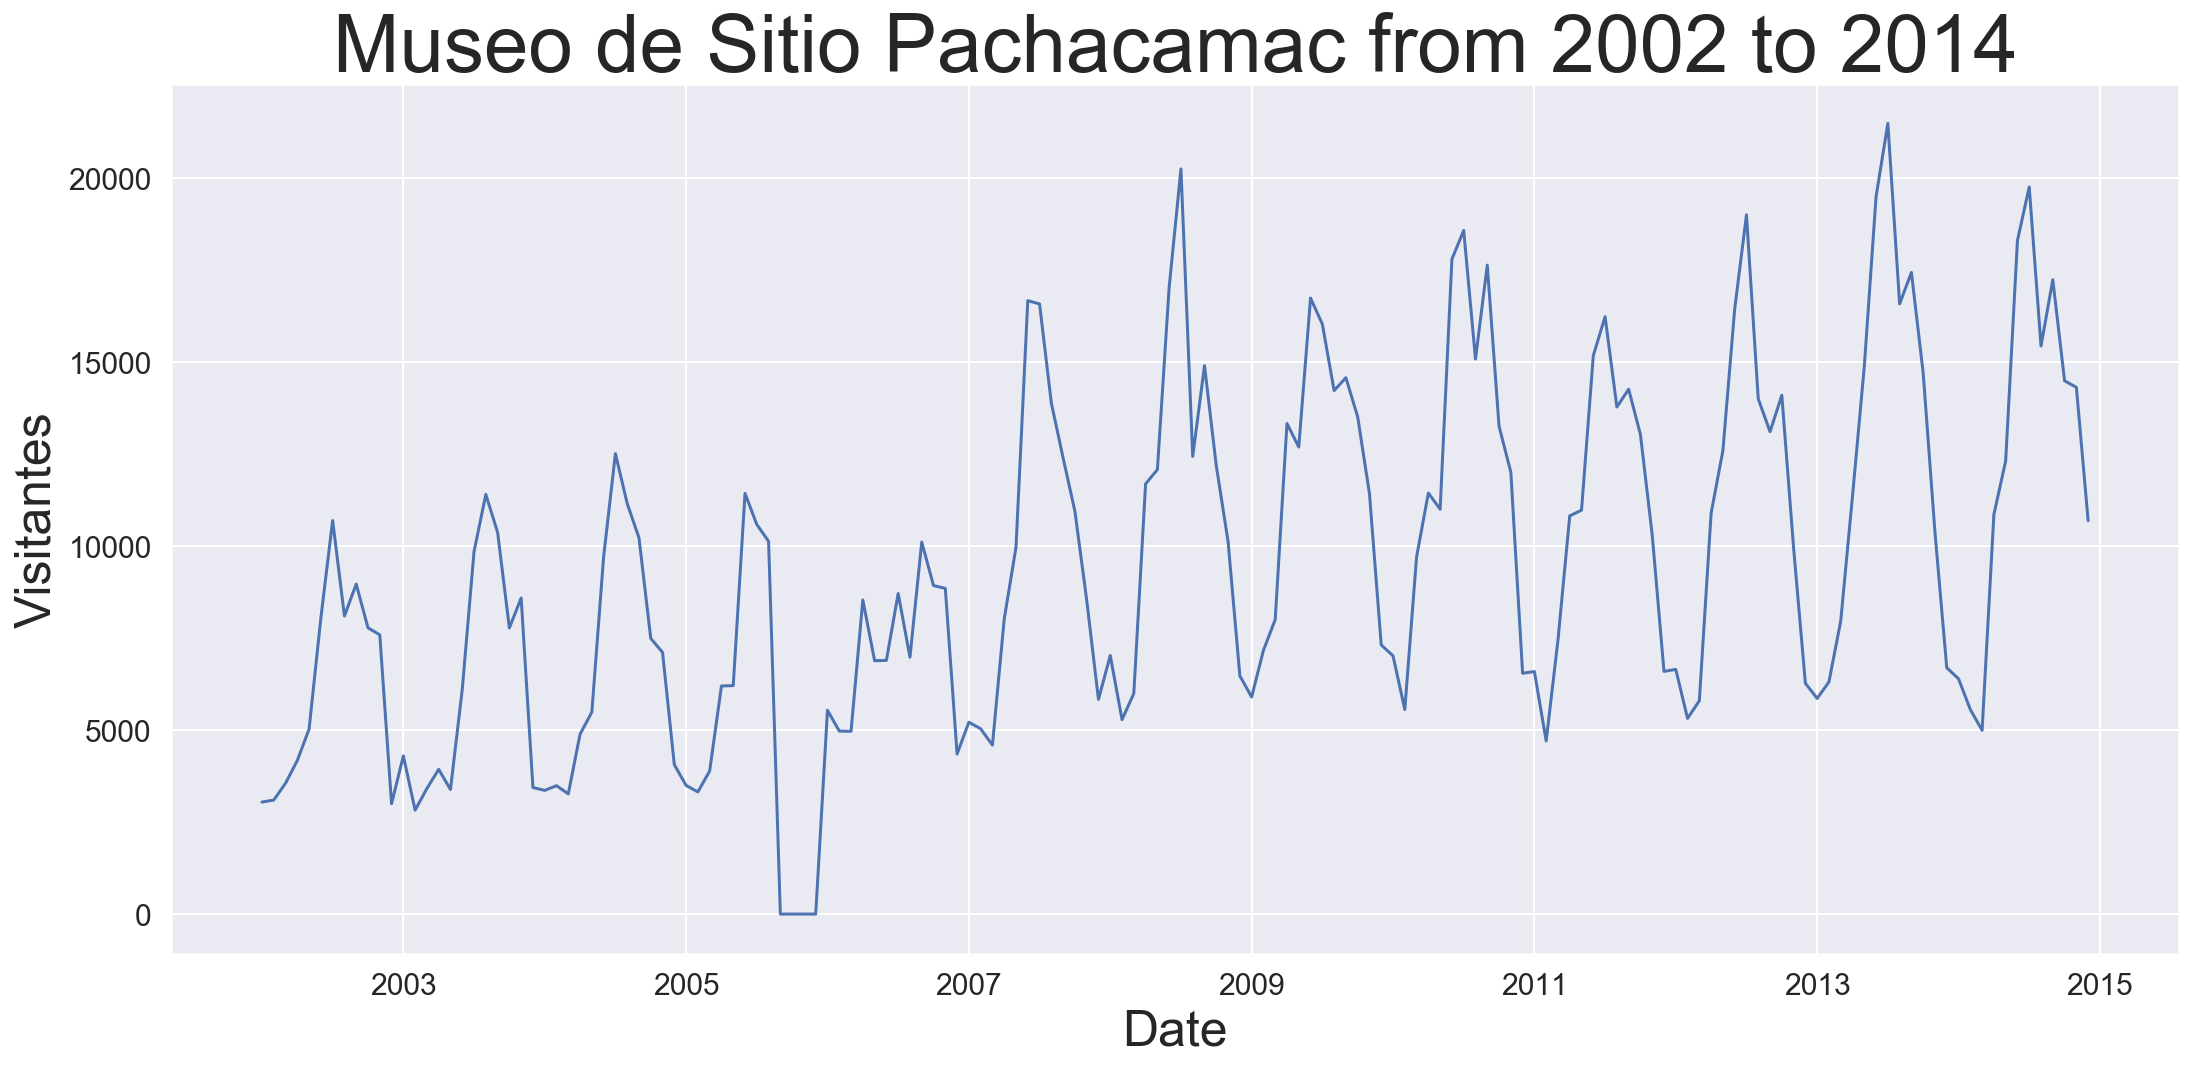

In [97]:
pachacamac = clean_excel_to_dataframe('Museo de Sitio Pachacamac.xls',
                                   'rptaniomes3',ski=4,year=2002)
pachacamac.plot()
plt.ylabel('Visitantes')
plt.title('Museo de Sitio Pachacamac from 2002 to 2014')
plt.show();

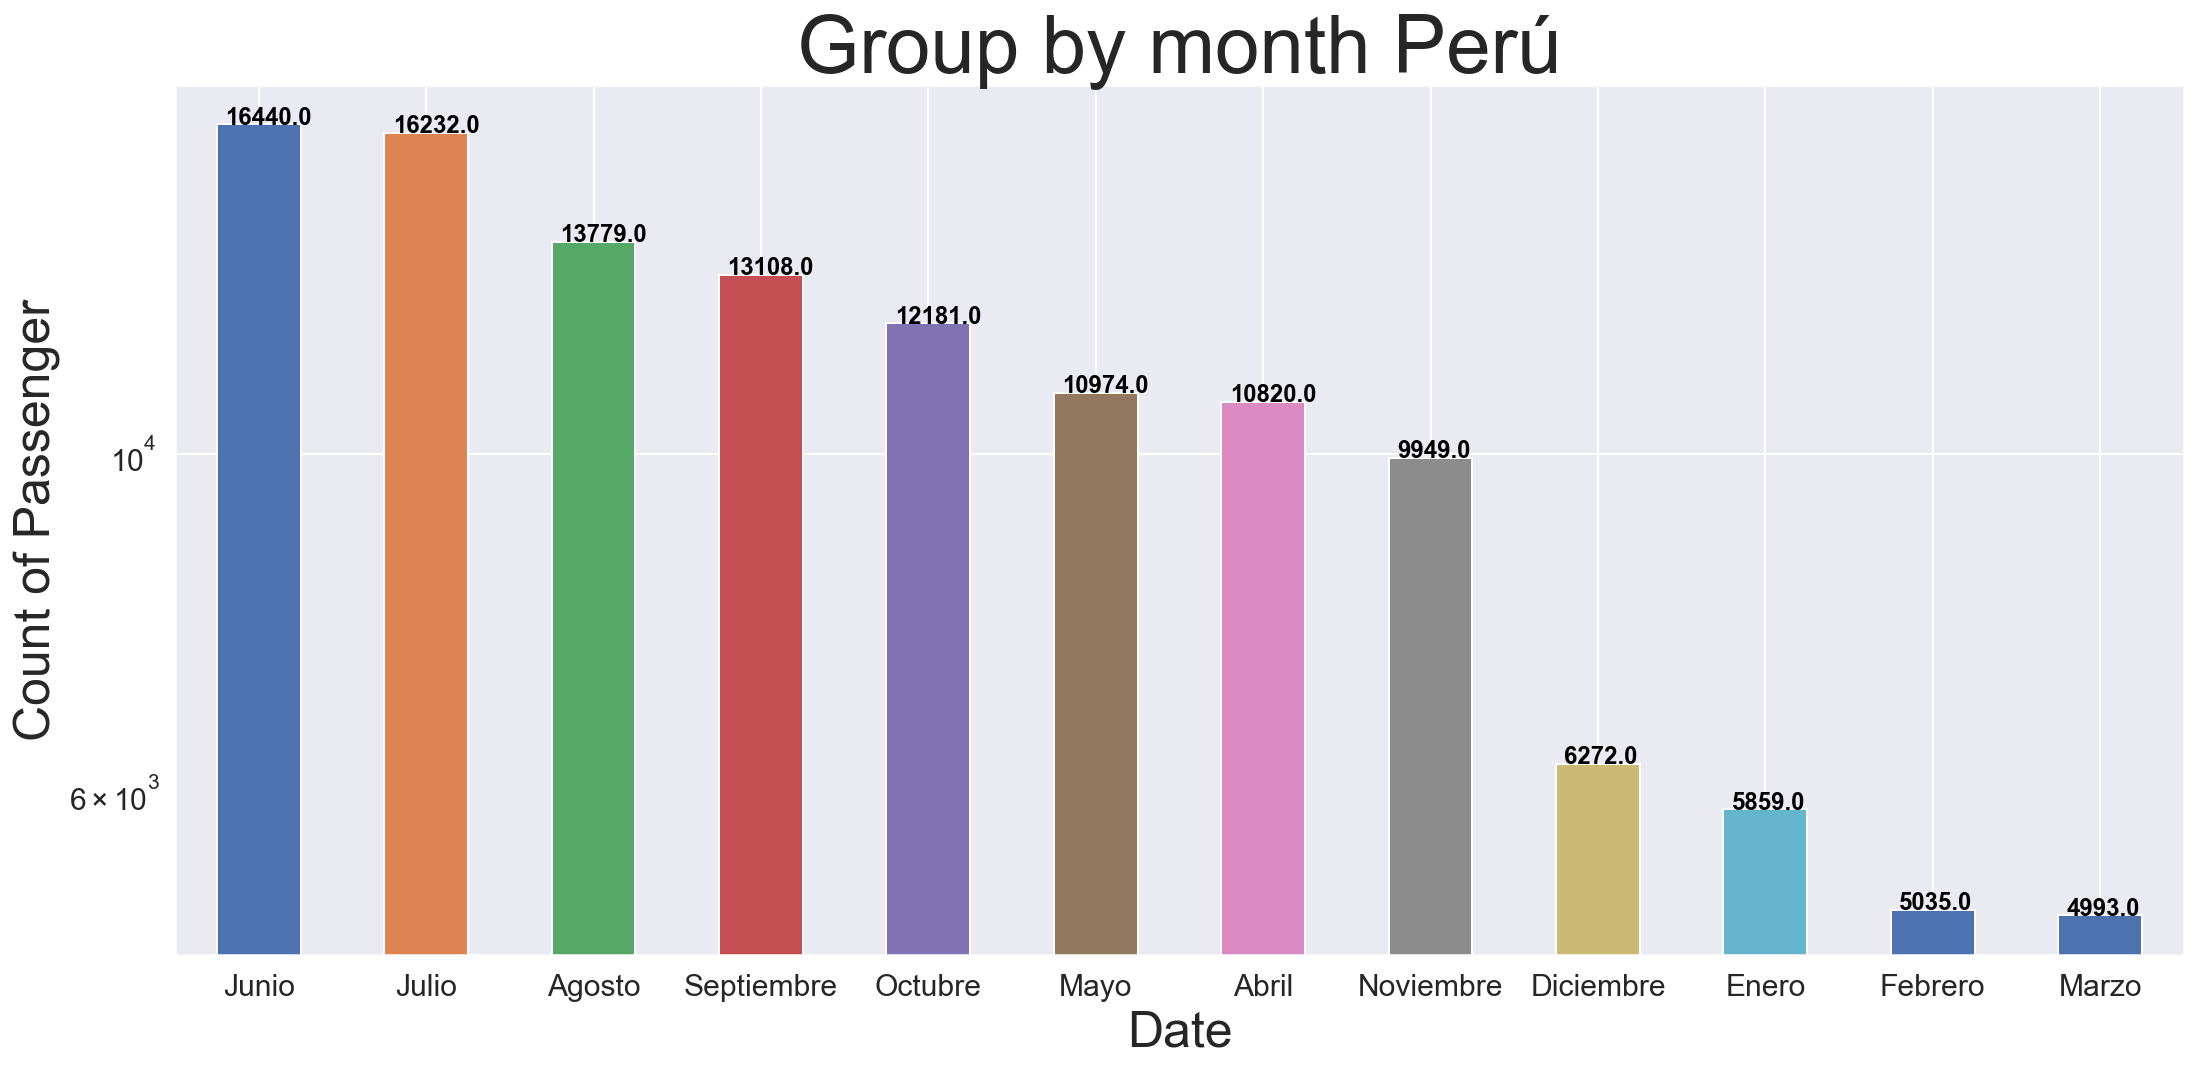

In [239]:
bar_plot(pachacamac)

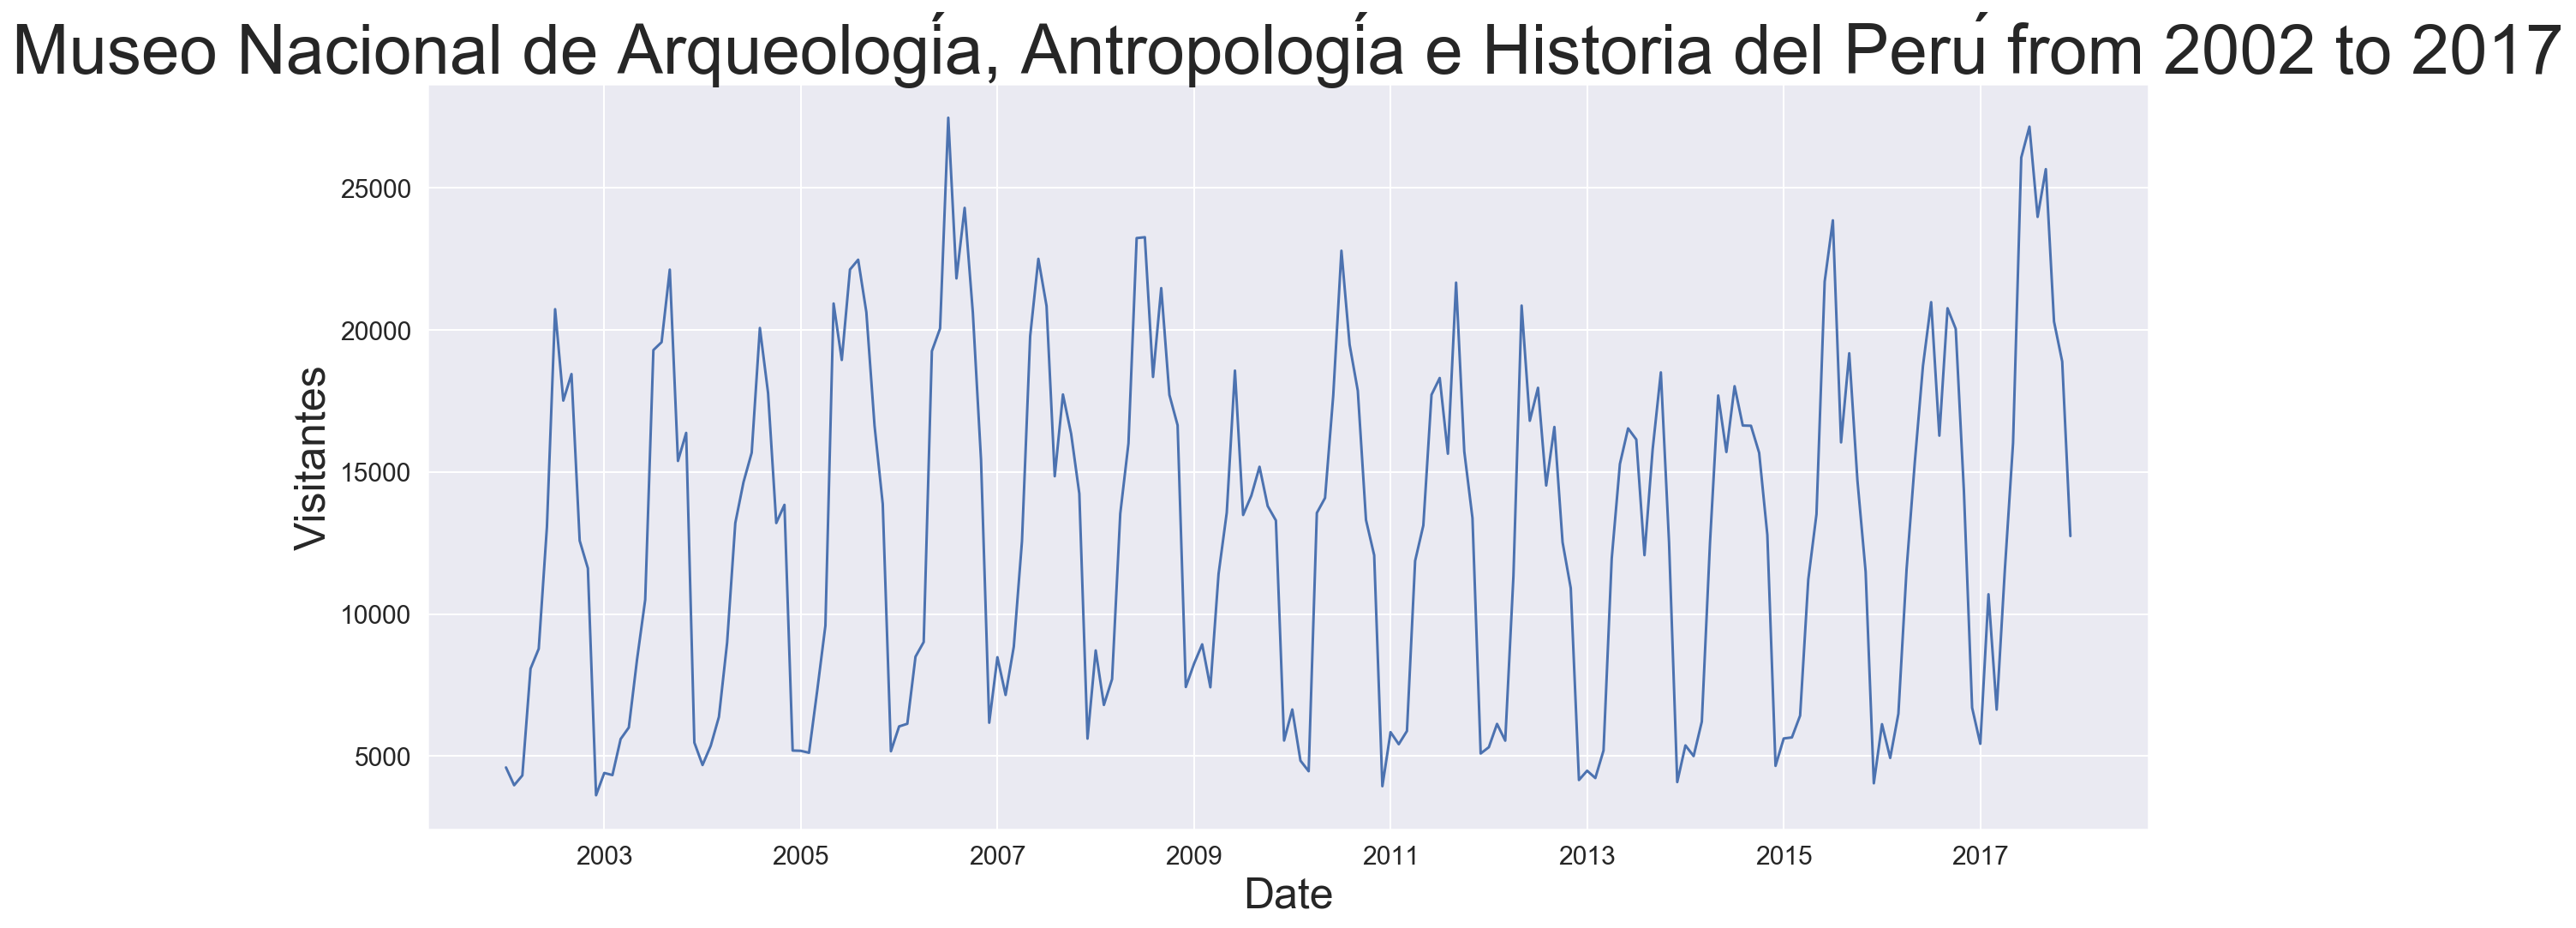

In [240]:
inquisicion = clean_excel_to_dataframe('Museo Nacional de Arqueología, Antropología e Historia del Perú.xls',
                                   'rptaniomes3',ski=4,year=2002)
inquisicion.plot()
plt.ylabel('Visitantes')
plt.title('Museo Nacional de Arqueología, Antropología e Historia del Perú from 2002 to 2017')
plt.show();

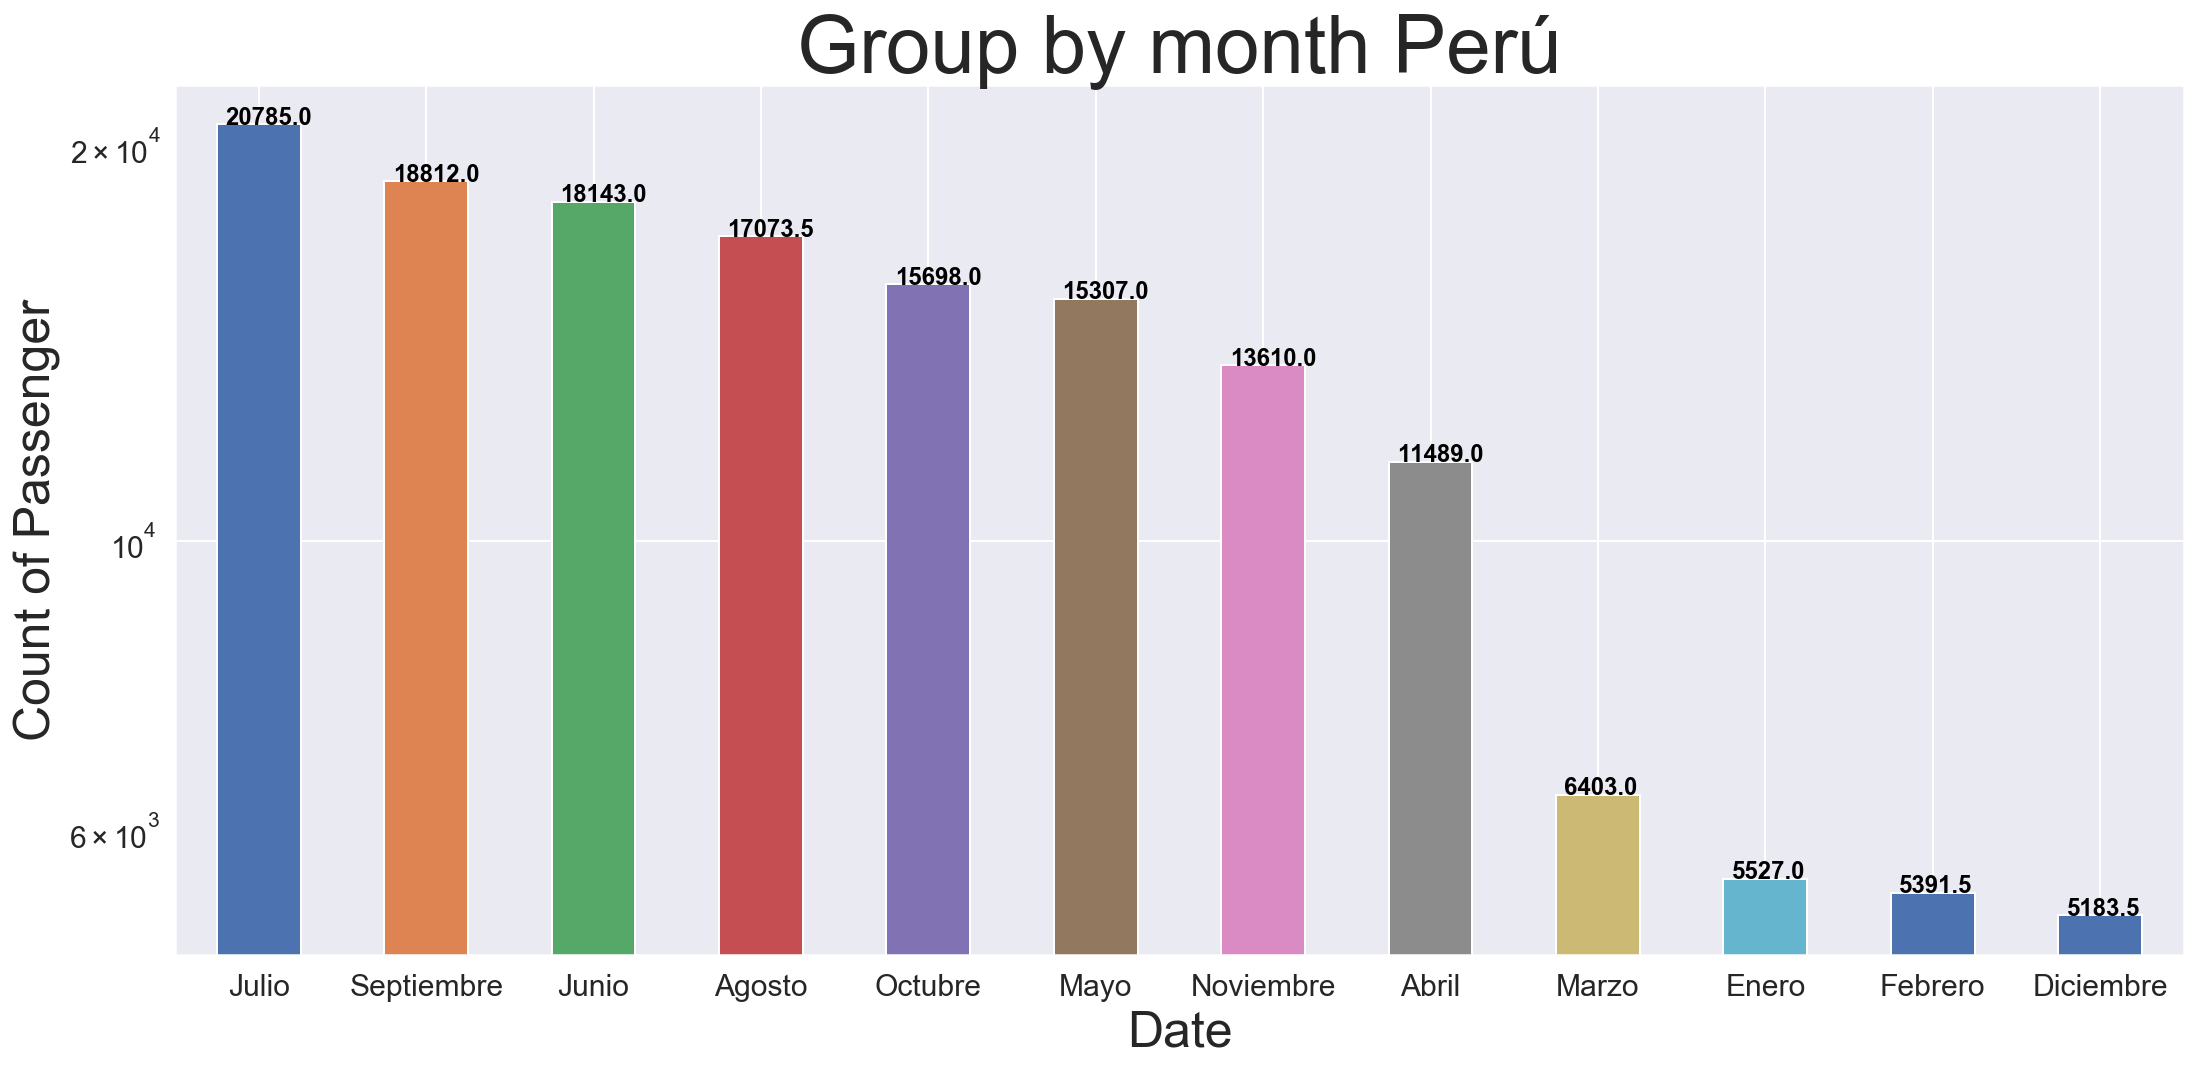

In [241]:
bar_plot(inquisicion)